<h1> Box Covering

The code in this notebook implements two box covering algorithms for networks to identify if they have fractal properties.

**Module Imports**

In [3]:
import fractalnetworks as fn

# Network analysis modules
from igraph import Graph
import igraph
import networkx as nx

# Mathematics modules
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.io import mmread
import scipy.stats
from sklearn.linear_model import LinearRegression

# Utility modules
import csv
from datetime import datetime
from operator import itemgetter
import os
import pandas as pd
import time
from tqdm import tqdm

<h2> Tutorial <a class="anchor" id="workspace"></a>

This area of the notebook can be used to work with the functions given, and some examples are provided. 

**Reading Graphs**

Graphs can be read from .gml files. 

In [33]:
eduG = Graph.Load("network-files/real-world/web-edu.gml", format="gml")
uvflowerG = Graph.Load("network-files/models/uv-flowers/23flower-generation4.gml", format="gml")
notredameG = Graph.Load("network-files/real-world/web-NotreDame.gml", format="gml")
authorG = Graph.Load("network-files/real-world/ca-sandi_auths.gml", format="gml")

`read_graph` can read network files in .gml, .mtx, .txt, .edge and .EDGE formats. If the data you are using uses an unusual format (e.g. an edge file with a specific delimiter) then the file may requires some preprocessing.

Use `summarise_graph` to display an output of the network's key features. 

In [34]:
summarise_graph(eduG)

Network has 3031 nodes and 6474 edges.
The average degree of the network is 4.27185747278126.
The average shortest path length is 4.271685489902483.
The diameter is 11.


**Finding Centres using MEMB**

The original MEMB method is applied using `MEMB` with a given network and value $\ell_B$.

In [334]:
centres = MEMB(uvflowerG, 5)
print(centres)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '23', '26', '29', '32', '35', '38', '41', '44', '47', '50', '53', '56', '59', '62', '65', '68', '71', '74', '77', '80', '83', '86', '89', '92', '21', '22', '24', '25', '27', '28', '30', '31', '33', '34', '36', '37', '39', '40', '42', '43', '45', '46', '48', '49', '51', '52', '54', '55', '57', '58', '60', '61', '63', '64', '66', '67', '69', '70', '72', '73', '75', '76', '78', '79', '81', '82', '84', '85', '87', '88', '90', '91', '93', '94', '95', '98', '101', '104', '107', '110', '113', '116', '119', '122', '125', '128', '131', '134', '137', '140', '143', '146', '149', '152', '155', '158', '161', '164', '167', '170', '173', '176', '179', '182', '185', '188', '191', '194', '197', '200', '203', '206', '209', '212', '215', '218', '221', '224', '227', '230', '233', '236', '239', '242', '245', '248', '251', '254', '257', '260', '263', '266', '269', '272', '275', '278', '281', 

The amended method, accelerated using the degrees of nodes, is applied using the function `degree_based_MEMB`.

In [349]:
centres = degree_based_MEMB(uvflowerG, 5)
print(centres)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '23', '26', '29', '32', '21', '35', '22', '24', '38', '25', '27', '41', '28', '30', '44', '31', '33', '47', '34', '36', '50', '37', '39', '53', '40', '42', '56', '43', '45', '59', '46', '48', '62', '49', '51', '65', '52', '54', '68', '55', '57', '71', '58', '60', '74', '61', '63', '77', '64', '66', '80', '67', '69', '83', '70', '72', '86', '73', '75', '89', '76', '78', '92', '79', '81', '82', '84', '85', '87', '88', '90', '91', '93', '94', '95', '98', '101', '104', '107', '110', '113', '116', '119', '122', '125', '128', '131', '134', '137', '140', '143', '146', '149', '152', '155', '158', '161', '164', '167', '170', '173', '176', '179', '182', '185', '188', '191', '194', '197', '200', '203', '206', '209', '212', '215', '218', '221', '224', '227', '230', '233', '236', '239', '242', '245', '248', '251', '254', '257', '260', '263', '266', '269', '272', '275', '278', '281', 

The methods can be compared using the function `compare_MEMB_methods`.

Bare in mind that this method calculates the diameter of the network unless a specific value for the optional argument `diam` is given, which can be expensive for large networks. 

In [355]:
compare_MEMB_methods(eduG)

For lB=1 the amended method finds the same number of centres, 3031.
It does so in 0.0 seconds compared to 0.0 seconds.
For lB=3 the amended method finds the same number of centres, 249.
It does so in 14.70% of the time: 7.109638452529907 seconds compared to 48.3789176940918 seconds.
For lB=5 the amended method finds the same number of centres, 12.
It does so in 16.95% of the time: 0.5502605438232422 seconds compared to 3.2455148696899414 seconds.
For lB=7 the amended method finds the same number of centres, 6.
It does so in 24.80% of the time: 0.3423166275024414 seconds compared to 1.3804903030395508 seconds.
For lB=9 the amended method finds the same number of centres, 3.
It does so in 20.21% of the time: 0.32207179069519043 seconds compared to 1.5932486057281494 seconds.
For lB=11 the amended method finds the same number of centres, 2.
It does so in 17.54% of the time: 0.26564550399780273 seconds compared to 1.5146548748016357 seconds.


You can see that the amended degree based method of MEMB is somewhat faster than the original method. This is especially true for graphs with large numbers of vertices, but you may see that the original method performs arbitrarily faster on very small graphs (a few hundred nodes, and a few milliseconds faster).

To find the values of $N_B$ for all $\ell_B = 1, \dots, \Delta$ where $\Delta$ is the diameter of the network use `calculate_lB_NB_dist`.

Note that the MEMB methods only work for odd values of $\ell_B$, so these are the only values checked. The same warning as above regarding calculating the diameter applied to this method.

In [358]:
lB, NB = calculate_lB_NB_dist(eduG)
print(NB)

[3031, 250, 13, 6, 5, 3]


**Finding the Best Fit**

The functions `find_best_fractal_fit` and `find_best_exp_fit` find the power-law fit of the form $N_B = A\ell_B^{-c}$ and exponential fit of the form $N_B = Ae^{-c\ell_B}$ which best fit the given data, and give their sum of squares regression score. 

In [425]:
(frac_A, frac_c), frac_score = find_best_fractal_fit(lB, NB)
print("A = {0}, c = {1}.".format(frac_A, frac_c))
print("SSR score = {0}.".format(frac_score))

A = 3030.3030303030305, c = 2.3989898989898992.
SSR score = 4313.673400097151.


In [428]:
(exp_A, exp_c), exp_score = find_best_exp_fit(lB, NB)
print("A = {0}, c = {1}.".format(exp_A, exp_c))
print("SSR score = {0}.".format(exp_score))

A = 9393.939393939394, c = 1.1363636363636365.
SSR score = 4326.223974426801.


The default range of values checked for the exponents $A$ and $c$ are $[0, 10000]$ and $[0, 12.5]$. Sometimes, better results may sit outside this range, which you can check by changing the parameters `A_min`, `A_max`, `c_min` and `c_max`.

In [431]:
(exp_A, exp_c), exp_score = find_best_exp_fit(lB, NB, A_max=15000)
print("A = {0}, c = {1}.".format(exp_A, exp_c))
print("SSR score = {0}.".format(exp_score))

A = 10757.575757575756, c = 1.2626262626262628.
SSR score = 290.1218008012543.


**Checking if a Network is Fractal**

The function `is_fractal` can be used to check if a given network is fractal or not, depending on whether it better follows a power law or exponential fit. If the exponential fit is better the network is assumed to be non-fractal, and the function returns False. Otherwise, it returns True.

In [870]:
is_fractal(authorG)

The SSR score for the fractal model is 6.055258854250086 and for the non-fractal model is 70.02147190510348.
This network is fractal.


True

**Plotting the Results**

The function `plot_lB_NB` plots the results of $N_B$ against the box diameters $\ell_B$. 

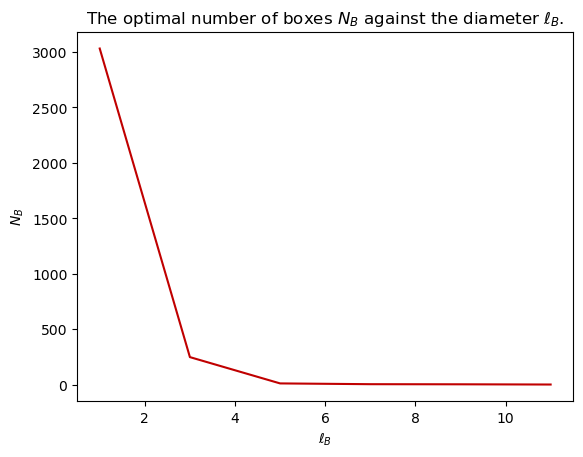

In [434]:
plot_lB_NB(lB, NB)

This can also be plotted on a log log scale using `plot_loglog_lB_NB`

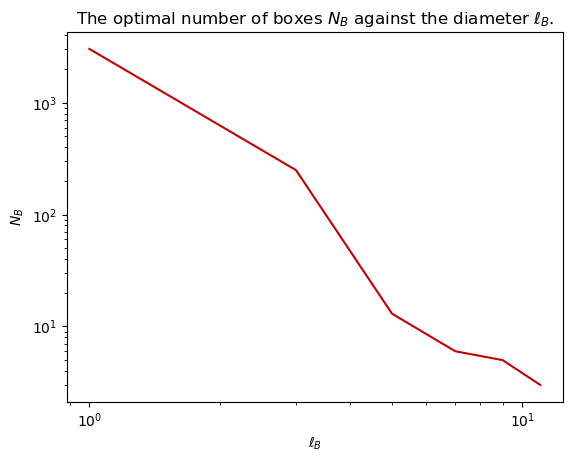

In [435]:
plot_loglog_lB_NB(lB, NB)

We can also visually compare the results of the best fits found for the fractal and non-fractal models. 

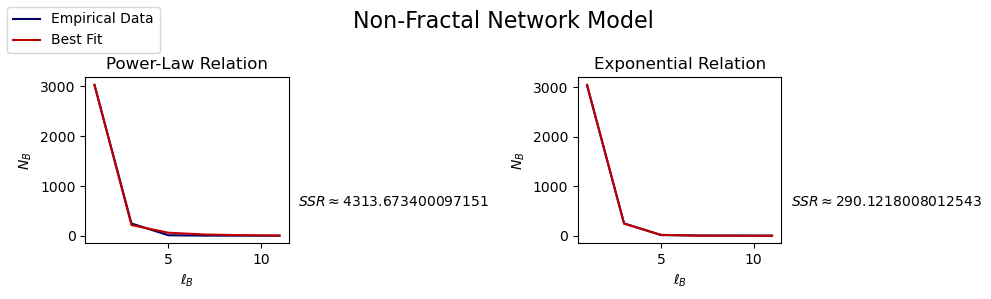

In [438]:
plot_best_fit_comparison(lB, NB, exp_A, exp_c, exp_score, frac_A, frac_c, frac_score)

**Finding Boxes**

There are three functions which can be used to find a box covering of a given network. They rely on having earlier run one of the MEMB methods to find the centres of the network. The following tutorial shows how you can find the boxes

In [35]:
centres = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '23', '26', '29', '32', '35', '38', '41', '44', '47', '50', '53', '56', '59', '62', '65', '68', '71', '74', '77', '80', '83', '86', '89', '92', '21', '22', '24', '25', '27', '28', '30', '31', '33', '34', '36', '37', '39', '40', '42', '43', '45', '46', '48', '49', '51', '52', '54', '55', '57', '58', '60', '61', '63', '64', '66', '67', '69', '70', '72', '73', '75', '76', '78', '79', '81', '82', '84', '85', '87', '88', '90', '91', '93', '94', '95', '98', '101', '104', '107', '110', '113', '116', '119', '122', '125', '128', '131', '134', '137', '140', '143', '146', '149', '152', '155', '158', '161', '164', '167', '170', '173', '176', '179', '182', '185', '188', '191', '194', '197', '200', '203', '206', '209', '212', '215', '218', '221', '224', '227', '230', '233', '236', '239', '242', '245', '248', '251', '254', '257', '260', '263', '266', '269', '272', '275', '278', '281', '284', '287', '290', '293', '296', '299', '302', '305', '308', '311', '314', '317', '320', '323', '326', '329', '332', '335', '338', '341', '344', '347', '350', '353', '356', '359', '362', '365', '368', '371', '374', '377', '380', '383', '386', '389', '392', '395', '398', '401', '404', '407', '410', '413', '416', '419', '422', '425', '428', '431', '434', '437', '440', '443', '446', '449', '452', '455', '458', '461', '464', '467']

In [53]:
# Using the previously calculated centres from the uvflowerG graph.

# Calculate the central distance for each node.
central_distance = find_central_distance(uvflowerG, centres)

# Assign each node to a box under the MEMB algorithm.
nodes_to_boxes = assign_nodes_to_boxes(uvflowerG, centres, central_distance)

# Find a list of nodes for each of the boxes. 
boxes = find_boxes(nodes_to_boxes, centres)

In [55]:
print(boxes)

{0: ['0', '97', '100', '118'], 1: ['1', '121', '127', '130', '133', '136', '142'], 2: ['2', '145', '148', '154', '157', '163', '166'], 3: ['3', '169', '175', '178', '181', '184', '190'], 4: ['4', '196', '211', '214'], 5: ['5', '223'], 6: ['6', '229', '238'], 7: ['7', '241'], 8: ['8', '256', '262'], 9: ['9', '265', '271'], 10: ['10', '277', '283', '286'], 11: ['11', '289'], 12: ['12', '301', '304', '307', '310'], 13: ['13', '322'], 14: ['14', '331', '334'], 15: ['15', '337', '340', '346'], 16: ['16', '349', '355'], 17: ['17', '364', '367'], 18: ['18', '373', '376'], 19: ['19', '388', '391', '394'], 20: ['20'], 21: ['23', '102', '103', '400'], 22: ['26', '109'], 23: ['29', '115'], 24: ['32', '120'], 25: ['35', '126', '412'], 26: ['38', '132'], 27: ['41', '139'], 28: ['44', '144', '421'], 29: ['47', '151', '424'], 30: ['50'], 31: ['53'], 32: ['56', '168', '433'], 33: ['59', '436'], 34: ['62', '180', '439'], 35: ['65', '187', '442'], 36: ['68', '193', '445'], 37: ['71', '198', '199', '448'

The result `boxes` is a dictionary which is stores the ID of each box as a key and the list of nodes in that box as the values.

**Box Renormalisation**

Sometimes we want to be able to visualise the box covering method. The function `draw_box_covering` displays the network using matplotlib and networkx, with each of the nodes colour coded according to the box they belong to. 

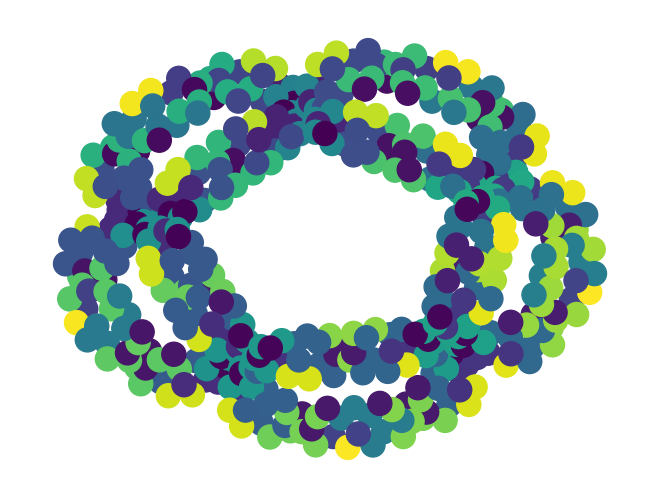

In [66]:
draw_box_covering(uvflowerG, nodes_to_boxes)

To see what the network looks after box renormalisation with supernodes the same colour as their respective boxes above we use `renormalise_graph`.

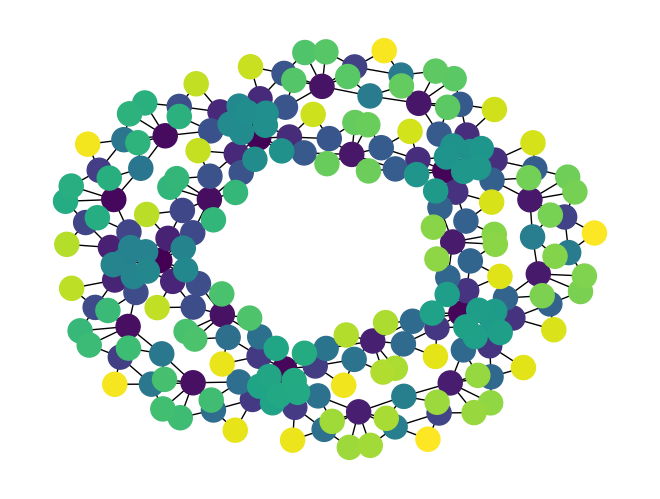

In [145]:
renormalise_graph(uvflowerG, boxes, nodes_to_boxes, draw=True)

We can also apply box coverings and renormalisation iteratively until only one supernode is left in the network. 

In [176]:
G = Graph.Load("network-files/models/uv-flowers/22flower-generation3.gml")

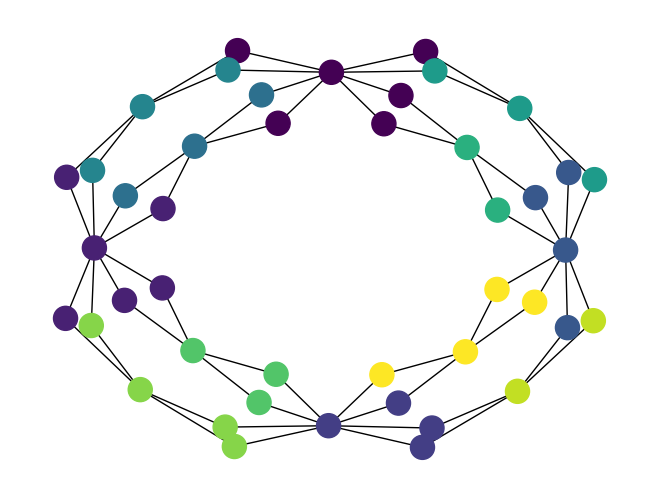

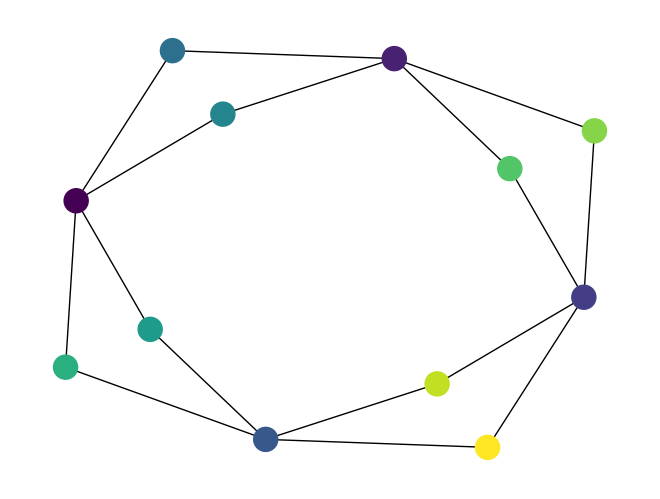

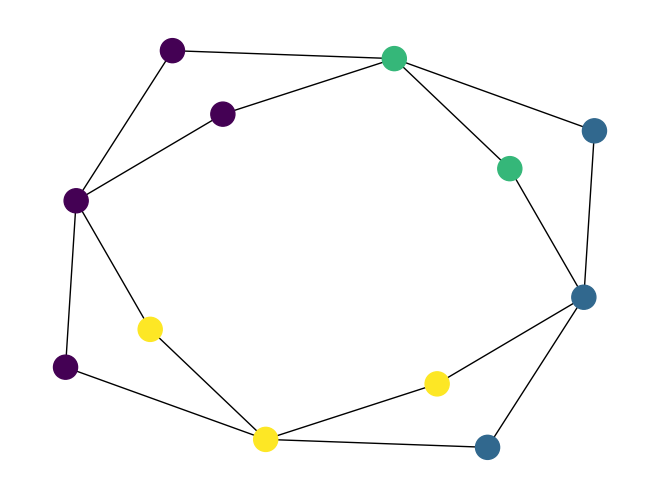

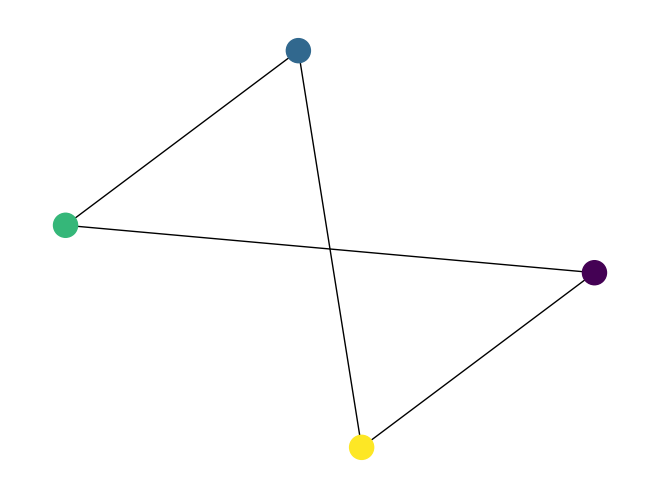

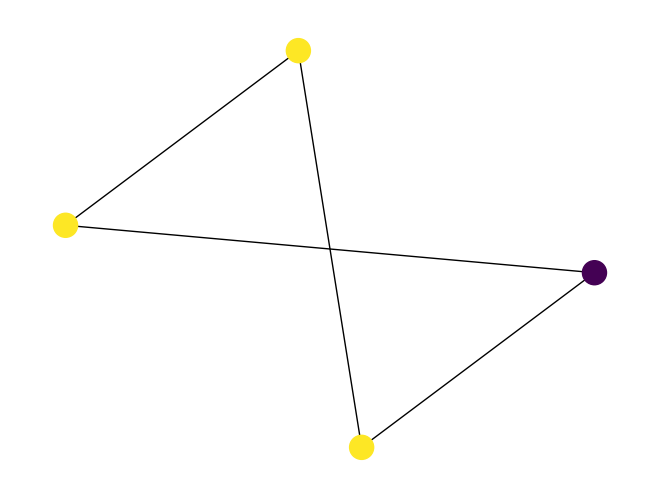

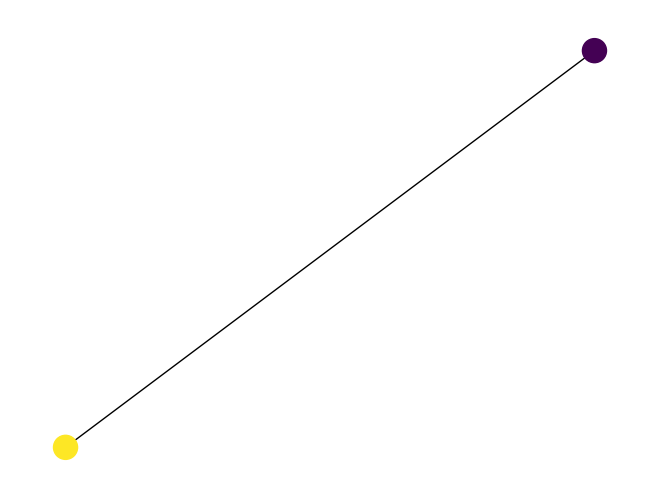

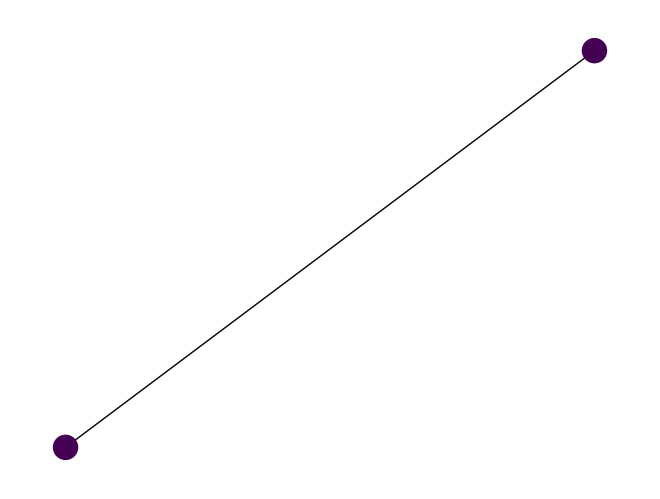

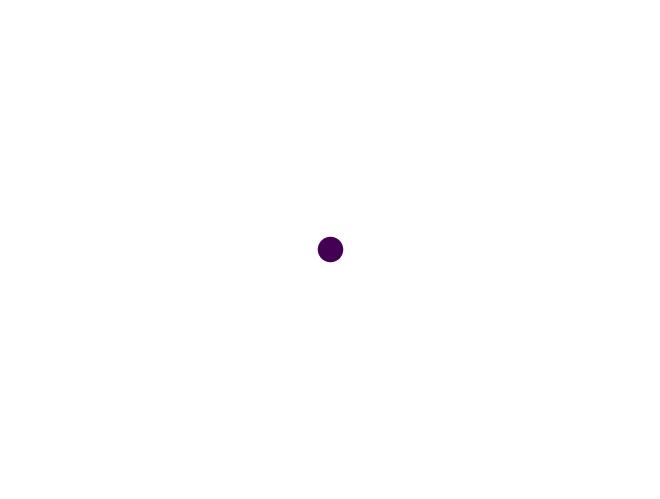

In [238]:
renormalise_iteratively("network-files/models/uv-flowers/22flower-generation3.gml", 3, method=MEMB, draw=True)

<h2> Workspace

This area of the notebook can be used to experiment with functions or write new code.

<h1> Functions <a class="anchor" id="functions"></a>

<h2> 1 Reading Graphs <a class="anchor" id="read"></a>

<h3> 1.1 Reading File Formats

`read_graph` can read network files in .gml, .mtx, .txt, .edge and .EDGE formats. If the data you are using uses an unusual format (e.g. an edge file with a specific delimiter) then the file may requires some preprocessing.

In [10]:
def read_graph(filepath):
    """
    Checks the filetype and calls the correct function to read the graph. 
    For any file not in .gml format, an additional .gml file is created. 
    Currently supports .mtx, .txt, .edge (.EDGE) and .gml filetypes.
    
    Args:
        filepath (str): Path for the network file.
        
    Returns:
        G (igraph.Graph): The network from the file stored as a graph.
    """
    # .gml files
    if filepath.endswith(".gml"):
        G = Graph.Load(filepath)
        
    elif filepath.endswith(".mtx"):
        G = read_mtx_graph_format(filepath)
        new_filepath = filepath.replace(".mtx", ".gml")
        nx.write_gml(G, new_filepath)
        G = Graph.Load(new_filepath)
    
    # .txt files
    elif filepath.endswith(".txt"):
        G = nx.read_edgelist(filepath)
        new_filepath = filepath.replace(".txt", ".gml")
        nx.write_gml(G, new_filepath)
        G = Graph.Load(new_filepath)
        
    # .edge or .EDGE files
    elif filepath.endswith(".edges") or filepath.endswith(".EDGES"):
        G = nx.read_weighted_edgelist(filepath)
        new_filepath = filepath.replace(".edges", ".gml")
        new_filepath = new_filepath.replace(".EDGES", ".gml")
        nx.write_gml(G, new_filepath)
        G = Graph.Load(new_filepath)
        
    # Raise an error if an unknown file type is used. 
    else:
        raise ValueError('This filetype is not supported for network analysis.')
 
    return G

In [12]:
def read_mtx_graph_format(filepath):
    """
    Reads graphs stored in the .mtx file format. Use with, for example, graphs from www.networkrepository.com.
    Note: Some files may need to be edited to make sure that scipy.io can read them. Files should have a header starting with %%MatrixMarket and a single line denoted the number of values in each column. 
    
    Args:
        filepath (str): Filepath to .mtx file
        
    Returns:
        G (networkx.Graph): Network read from file. 
    """
    # Read the file using the scipy.io file reader. 
    mmf = mmread(filepath)
    # Generate a graph from this file. 
    G = nx.from_scipy_sparse_array(mmf)
    # Return the graph.
    return G

<h3> 1.2 Finding Graph Properties

The following function `summarise_graph` summarises the key properties of the network given. Calculating the diameter and the average shortest path length is expensive, and so this is only recommended for graphs with relatively few nodes. 

In [15]:
def summarise_graph(G, skip_diam=False, skip_aspl=False):
    """
    Summarises the key attributes of a given network. 
    
    Args:
        G (igraph.Graph): The network to be analysed.
        skip_diam (Bool) (opt): If True, then do not calculate the diameter of the graph. This is recommended for large graphs. The default is False.
        skip_aspl (Bool) (opt): If True, then do not calculate the average shortest path length of the graph. This is recommended for large graphs. The default is False. 
    
    Returns:
        None    
    """
    # Display the size and order of the network.
    print("Network has {0} nodes and {1} edges.".format(G.vcount(), G.ecount()))
    
    # Calculate and display the average degree of the network.
    degree_dist = [G.degree(node) for node in G.vs]
    avg_degree = sum(degree_dist)/len(degree_dist)
    print("The average degree of the network is {0}.".format(avg_degree))
    
    # If chosen, find the average shortest path length.
    if not skip_aspl:
        print("The average shortest path length is {0}.".format(np.mean(G.distances())))
        
    # If chosen, find the diameter.
    if not skip_diam:
        print("The diameter is {0}.".format(G.diameter()))

<h2> 2 Maximal Excluded Mass Burning Algorithms <a class="anchor" id="MEMB"></a>

The Maximum Excluded Mass Burning (MEMB) algorithm [1] calculates the box-covering for a given network as follows:

1. Initially, mark all nodes as uncovered and non-centres.
2. For each non-centre node calculate the excluded mass. The excluded mass is defined as the number of uncovered nodes within a radius $r_B$ of the node.
3. Let the node with the maximum excluded mass be $p$, let $p$ be a centre and let all nodes within a radius $r_B$ from $p$ be covered.
4. Repeat steps 2 and 3 until all nodes in the network are covered. 

Once a list of centres has been found as above, the boxes in the network are found as follows:

1. Assign each centre node a box ID.
2. For each node $v$ calculate the central distance, which is the minimum $d(u,v)$ where $u$ is a centre. All centres have a a central distance of 0 and all nodes have central distance strictly less than $r_B$.
3. Rearrange all non-centre nodes in order of increasing central distance.
4. Each non-centre node must have at least one neighbour with central distance less than their own. Assign each node to the box of this neighbour. If there are multiple options for this neighbour, then choose randomly. Repeat this step for all non-centres in the order found by step 3.

<h3>2.1 MEMB Algorithms

The following functions implement the Maximal Excluded Mass Burning algorithm: first the original method in `MEMB` and second the amended method based on degree centrality in `degree_based_MEMB` (see [2] for details). The `accelerated_MEMB` algorithm speeds up computation by only computing the excluded mass for nodes with high excluded mass in the previous iteration (see [2]). `distance_based_MEMB` calculates the centres for every diameter $l_B$ by first calculating the shortest path distance between every pair of nodes. This will result in a memory issue for large graphs. It is faster than tradition `MEMB`, but slower than `accelerated_MEMB`.

**Original MEMB**

In [21]:
def traditional_MEMB(G, lB, deterministic=True):
    """
    Implements the Maximal Excluded Mass Burning algorithm as according to [1].
    Note: Only works for odd numbers of lB, otherwise it takes rB to be the floor of (lB-1)/2 which is the same as for the odd lB-1.
    
    Args: 
        G (igraph.Graph): The network the algorithm is to be applied to. 
        lB (int): The diameter of the boxes used to cover the network.
        deterministic (Bool) (opt): If False, choose fom nodes with equal excluded mass randomly. If True, choose the first lexicographically.
    
    Returns: 
        centres (list): A list of nodes assigned to be centres under the MEMB algorithm. 
    """
    
    # If the diameter lB is less than or equal to 2, then the maximum radius is 0 and so every node is in its own box.
    if lB == 1 or lB == 2:
        return list([v["label"] for v in G.vs()])
    
    number_EM_calcs = 0
    
    # Start with all nodes being uncovered and non-centres. 
    uncovered = G.vs()["label"]
    non_centres = G.vs()
    
    # Initialise empty lists for the covered and centre nodes. 
    covered = []
    centres = []
    
    # Each box can have diameter of up to lB, so the maximum radius is rB = (lB-1)/2.
    rB = int((lB-1)/2)

    # Iterate while there are still nodes uncovered in the graph.
    while len(uncovered) > 0:

        # Start with a maximum excluded mass of zero, and no node p [1].
        p = None
        maximum_excluded_mass = 0
        
        # For the non-deterministic method, keep a list of nodes with equal maximum excluded mass 
        possible_p = []

        # For each node that isn't a centre, find the excluded mass.
        for node in G.vs():
            if node["label"] not in centres: # Check that the node isn't a centre.
                # The excluded mass is the number of uncovered nodes in within a radius of rB.
                excluded_mass = len(list(set(G.neighborhood([node], order=rB)[0])-set(covered)))
                number_EM_calcs += 1
                # If the excluded mass of this node is greater than the current excluded mass, choose this node.
                if excluded_mass > maximum_excluded_mass:
                    p = node # Update p.
                    maximum_excluded_mass = excluded_mass # Update maximum excluded mass.
                    possible_p = [node] # Update list of possible nodes for non-deterministic method.
                # If the excluded mass of this node is equal to the current maximum excluded mass, then add this node to the list of possible p.
                elif excluded_mass == maximum_excluded_mass:
                    possible_p.append(node)
                    
        # If the non-deterministic method is chosen, then randomly choose a node from the list of possible p.
        if not deterministic:
            p = random.choice(possible_p)

        # Add the chosen p to the list of centres. 
        centres.append(p["label"])


        # Find the graph centred on the node p with radius rB.
        H = G.neighborhood([p], order=rB)[0]
        # Iterate through the nodes in this subgraph.
        for node in H:
            covered.append(node) # Cover the nodes in the subgraph.
            # Remove these nodes from the list of uncovered nodes.
            if str(node) in uncovered:
                uncovered.remove(str(node)) 
    
    # Once all the nodes are covered, return the list of centres. 
    return centres, number_EM_calcs 
    
        

In [22]:
def MEMB(G, lB, deterministic=True):
    """
    Implements the Maximal Excluded Mass Burning algorithm as according to [1], with some time improvements. 
    In this version, the nodes within a radius r_B of a node are only found once, and then updated using the list of covered nodes. 
    Note: Only works for odd numbers of lB, otherwise it takes rB to be the floor of (lB-1)/2 which is the same as for the odd lB-1.
    
    Args: 
        G (igraph.Graph): The network the algorithm is to be applied to. 
        lB (int): The diameter of the boxes used to cover the network.
        deterministic (Bool) (opt): If False, choose fom nodes with equal excluded mass randomly. If True, choose the first lexicographically.
    
    Returns: 
        centres (list): A list of nodes assigned to be centres under the MEMB algorithm. 
    """
    
    # If the diameter lB is less than or equal to 2, then the maximum radius is 0 and so every node is in its own box.
    if lB == 1 or lB == 2:
        return list([v["label"] for v in G.vs()])
    
    # Start with all nodes being uncovered and non-centres. 
    uncovered = G.vs()["label"]
    non_centres = G.vs()
    
    # Initialise empty lists for the covered and centre nodes. 
    covered = []
    centres = []
    
    # Each box can have diameter of up to lB, so the maximum radius is rB = (lB-1)/2.
    rB = int((lB-1)/2)
    
    # Initialise an empty dictionary to store nodes and a list of nodes in the graphs centred on these nodes with a radius rB.
    # Doing this stops us from having to generate the same subgraphs multiple times, which is expensive. 
    eg_dict = {}
    
    # For each node find the neighbours of that node within a radius rB. 
    for node in G.vs():
        [neighbors] = G.neighborhood([node], order=rB)
        eg_dict[node["label"]] = neighbors # Add the list of nodes to the dictionary.

    # Iterate while there are still nodes uncovered in the graph.
    while len(uncovered) > 0:

        # Start with a maximum excluded mass of zero, and no node p [1].
        p = None
        maximum_excluded_mass = 0
        
        # For the non-deterministic method, keep a list of nodes with equal maximum excluded mass 
        possible_p = []

        # For each node that isn't a centre, find the excluded mass.
        for node in G.vs():
            if node["id"] not in centres: # Check that the node isn't a centre.
                # The excluded mass is the number of uncovered nodes in within a radius of rB.
                excluded_mass = len(list(set(eg_dict[node["label"]])-set(covered)))
                # If the excluded mass of this node is greater than the current excluded mass, choose this node.
                if excluded_mass > maximum_excluded_mass:
                    p = node # Update p.
                    maximum_excluded_mass = excluded_mass # Update maximum excluded mass.
                    possible_p = [node] # Update list of possible nodes for non-deterministic method.
                # If the excluded mass of this node is equal to the current maximum excluded mass, then add this node to the list of possible p.
                elif excluded_mass == maximum_excluded_mass:
                    possible_p.append(node)
        
        # If the non-deterministic method is chosen, then randomly choose a node from the list of possible p.
        if not deterministic:
            p = random.choice(possible_p)

        # Add the chosen p to the list of centres. 
        centres.append(p["label"])

        # Find the graph centred on the node p with radius rB.
        H = eg_dict[p["label"]] 
        # Iterate through the nodes in this subgraph.
        for node in H:
            covered.append(node) # Cover the nodes in the subgraph.
            # Remove these nodes from the list of uncovered nodes.
            if str(node) in uncovered:
                uncovered.remove(str(node))      
    
    # Once all the nodes are covered, return the list of centres. 
    return centres
    
        

**Degree Based MEMB**

In [24]:
def degree_based_MEMB(G, lB, deterministic=True, N=10,  verbose=False):
    """
    Implements the Maximal Excluded Mass Burning algorithm as according to [1], adjusted to prioritise nodes with high degree. 
    This reduces the running time of the traditional MEMB without losing accuracy.
    Note: Only works for odd numbers of lB, otherwise it takes rB to be the floor of (lB-1)/2 which is the same as for the odd lB-1.
    
    Args: 
        G (igraph.Graph): The network the algorithm is to be applied to. 
        lB (int): The diameter of the boxes used to cover the network.
        deterministic (Bool) (opt): If False, choose fom nodes with equal excluded mass randomly. If True, choose the first lexicographically.
        N (int): Takes the top N-th nodes by degree to find the centred subgraph of. 
    
    Returns: 
        centres (list): A list of nodes assigned to be centres under the MEMB algorithm. 
    """
    
    # If the diameter lB is less than or equal to 2, then the maximum radius is 0 and so every node is in its own box.
    if lB == 1 or lB == 2:
        return list([v["label"] for v in G.vs()])
    
    # Start with all nodes being uncovered and non-centres. 
    uncovered = G.vs()["label"]
    
    # Initialise empty lists for the covered and centre nodes. 
    centres = []
    covered = []
    
    # Each box can have diameter of up to lB, so the maximum radius is rB = (lB-1)/2.
    rB = int((lB-1)/2)

    # Find the N nodes with the greatest degree centrality. 
    dc = degree_centrality(G)
    top_N_dc = dict(sorted(dc.items(), key=itemgetter(1), reverse=True)[:N])

    # Initialise an empty dictionary to store nodes and a list of nodes in the graphs centred on these nodes with a radius rB.
    # Doing this stops us from having to generate the same subgraphs multiple times, which is expensive. 
    eg_dict = {}
    for node in G.vs():
        # Only check the top N graphs according to degree centrality. 
        if node["label"] in top_N_dc:
            [neighbors] = G.neighborhood([node], order=rB)
            eg_dict[node["label"]] = neighbors # Add the list of nodes to the dictionary.
        
    
    # On the initial iteration, set maiden to True.
    maiden = True
    
    # This variable checks if the algorithm does not find a solution, and then looks at the next N nodes. 
    failed = False
    
    # Iterate while there are still nodes uncovered in the graph.
    while len(uncovered) > 0:
        
        start = time.time()
        
        # For all iterations except the first, calculate the new dictionary of nodes in each subgraph of radius rB.
        if not maiden:
            eg_dict = calc_next_iter(G, uncovered, N, dc, eg_dict, rB, centres, p, failed)
        maiden = False

        # Start with a maximum excluded mass of zero, and no node p [1].
        p = None
        maximum_excluded_mass = 0
        
        # For the non-deterministic method, keep a list of nodes with equal maximum excluded mass 
        possible_p = []
        
        # For each of the top N nodes by degree, find the excluded mass. 
        for node in eg_dict:
            # The excluded mass is the number of uncovered nodes in within a radius of rB. 
            excluded_mass = len(list(set(eg_dict[node])-set(covered)))
            # If the excluded mass of this node is greater than the current excluded mass, choose this node.
            if excluded_mass > maximum_excluded_mass:
                p = node # Update p.
                maximum_excluded_mass = excluded_mass # Update maximum excluded mass. 
                possible_p = [node] # Update list of possible nodes for non-deterministic method.
            # If the excluded mass of this node is equal to the current maximum excluded mass, then add this node to the list of possible p.
            elif excluded_mass == maximum_excluded_mass:
                possible_p.append(node)
            
        # If the non-deterministic method is chosen, then randomly choose a node from the list of possible p.
        if not deterministic:
            p = random.choice(possible_p)
        
        # Check if the method fails to find a node p. 
        # The method only fails if every single node has zero uncovered nodes within a radius rB. 
        if p == None:
            # If it does fail, remove all the nodes that have already been tried from the list of top N nodes. 
            failed=True # Set the failed variable.
            for tried_node_label in eg_dict:
                dc.pop(tried_node_label)
        else:    
            # Otherwise, add the new p to the list of centre nodes. 
            centres.append(p)
            # Update the list so that the newly covered nodes are in the list of covered nodes and not in the list of uncovered nodes. 
            for node in eg_dict[p]:
                if str(node) in uncovered:
                    uncovered.remove(str(node)) 
                    covered.append(int(node))
            failed=False # Reset the failed variable.
        
        end = time.time()
        
        if verbose:
            print("\n {0} centres found, {1} uncovered nodes remaining.".format(len(centres), len(uncovered)))
            print("This round took {0} seconds.".format(end-start))

    # Once all the nodes are covered return the list of centres found in the graph.
    return centres

**Calculating the Degree Centrality**

In [26]:
def degree_centrality(G):
    """
    Calculates a dictionary of the degree centralities for all nodes in a graph. 
    Analagous to the NetworkX degree_centrality method. 
    
    Args: 
        G (igraph.Graph): The network the algorithm is to be applied to. 
    
    Returns:
        dc (dict): A dictionary with node labels as keys and their degree centralities as the values. 
    """
    
    # Initialise an empty dictionary
    dc = {}
    
    # Iterate through each node in the graph
    for node in G.vs():
        # Find the degree of the node
        d = G.degree(node)
        # Normalise by the maximum possible degree (n-1) and add to dictionary
        dc[node["label"]] = d/(G.vcount()-1)
    
    return dc
    

**Calculating the Next Iteration**

`calc_next_iter` updates the values to be checked in the next iteration of the amended degree based MEMB algorithm.

In [29]:
def calc_next_iter(G, uncovered,  N, dc, eg_dict, rB, centres, p, failed):
    """
    Finds the top N nodes to check in the next iteration of the algorithm.
    
    Args:
        G (igraph.Graph): The network being analysed. 
        uncovered (list): A list of nodes in the network which are uncovered at this stage.
        N (int): The number of nodes to check in the next iteration of the algorithm.
        dc (dict): Dictionary containing the degree centrality of each node which is yet to be checked as a centre.
        eg_dict (dict): Dictionary with keys as nodes and values as the list of nodes within a distance of rB from that node.
        rB (int): The radius rB to be checked. 
        centres (list): List of nodes identified as centres. 
        p (str): Name of the node chosen as the most recent p [1].
        failed (Bool): True if the previous iteration of the algorithm failed, and False otherwise. 
    
    Returns:
        eg_dict (dict): Returns an updated version of eg_dict with the nodes to be checked for the next iteration. 
    """
    
    # If the algorithm failed in the previous iteration, then remove the most recent node p from the dictionary. 
    # This node was chosen as a centre in the last stage, and so it does not need to be considered again.
    if not failed:
        dc.pop(p)
        
    # Choose the top N nodes by degree centrality. 
    top_N_dc = dict(sorted(dc.items(), key=itemgetter(1), reverse=True)[:N])
    
    # Initialise an empty updated version of eg_dict.
    new_eg_dict = {}

    # For each of the top N nodes, assign the list of nodes in the subgraph of radius rB centred around the node to the new dictionary.
    for node in G.vs():
        if node["label"] in top_N_dc:
            # If the subgraph has already been found then reference the old dictionary to prevent recalculating the subgraph.
            if node["label"] in eg_dict:
                new_eg_dict[node["label"]] = eg_dict[node["label"]]
            # If not, then find the graph and add it to the new dictionary.
            else:
                [neighbors] = G.neighborhood([node], order=rB)
                new_eg_dict[node["label"]] = neighbors # Add the list of nodes to the dictionary.

    # Once this is done for all the relevant nodes, return the new updated dictionary.
    return new_eg_dict

**Accelerated MEMB**

The following method calculated the maximum excluded mass by only calculating the value at each stage for the nodes with the highest excluded mass in the previous stage. 

In [32]:
def accelerated_MEMB(G, lB):
    """
    Implements the Maximal Excluded Mass Burning algorithm as according to [1], with accelerated performance.
    Rather than calculating the excluded mass for all nodes at each stage, calculate the excluded mass of the node with the next highest excluded mass in the previous stage.
    Then reject all nodes with excluded mass in the previous stage less than this value (excluded mass can only decrease between stages)
    Repeat until only one node is left, and this becomes the next p.
    Note: Only works for odd numbers of lB, otherwise it takes rB to be the floor of (lB-1)/2 which is the same as for the odd lB-1.
    
    Args: 
        G (igraph.Graph): The network the algorithm is to be applied to. 
        lB (int): The diameter of the boxes used to cover the network.

    Returns: 
        centres (list): A list of nodes assigned to be centres under the MEMB algorithm. 
    """
    
    number_EM_calcs = 0
    
    # If the diameter lB is less than or equal to 2, then the maximum radius is 0 and so every node is in its own box.
    if lB == 1 or lB == 2:
        return list([v["label"] for v in G.vs()]), 0
    
    # Each box can have diameter of up to lB, so the maximum radius is rB = (lB-1)/2.
    rB = int((lB-1)/2)
    
    # Initialise empty lists for the covered and centre nodes. 
    centres = []
    covered = []
    
    # The labels of the uncovered nodes are 0, ..., n-1 where n is the order of the network.
    uncovered = [i for i in range(G.vcount())]
    
    # Initialise an empty dictionary for the excluded mass of each node.
    excluded_mass = {}
    
    # For each node, calculate the initial excluded mass by finding the number of neighbours within a radius rB.
    for node in G.vs():
        excluded_mass[node] = G.neighborhood_size(node, order=rB)
        number_EM_calcs += 1
        
    # Rank the non-centre nodes in order from highest excluded mass to lowest. 
    ordered_list = sorted(excluded_mass.items(), key=lambda item: item[1], reverse=True)
    
    # On the initial iteration, set maiden to True.
    maiden = True
    
    # The first value of p is that in the 1st position in the ordered list. 
    p_value = ordered_list[0]
    
    # Iterate while there are still uncovered nodes in the network.
    while len(uncovered) > 0:

        # If it is not the first iteration, then find the values for the next iteration.
        if not maiden:
            # Find the next p using the method described above. 
            ordered_list, p_value, number_EM_calcs = find_next_centre(G, covered, rB, ordered_list, number_EM_calcs)
            # Reorder the list according to decreasing excluded mass. 
            # Note at this stage, that some of the nodes have their excluded mass from different stages of the iterative process. 
            # This does not affect the outcome. 
            ordered_list = sorted(ordered_list, key=lambda x:x[1], reverse=True).copy()
        else:
            # If this is the first iteration then reset the maiden variable. 
            maiden = False
    
        # Take the label of the node to be the next p. 
        p = p_value[0].index
        # Add p to the list of centres.
        centres.append(p)
        # Remove p from the list of non-centres. 
        ordered_list.remove(p_value)
        
        # Find the neighbours of the new centre p within a radius rB.
        neighbours = G.neighborhood(p, order=rB)
        # Cover each of the nodes in this radius, and remove them from the list of uncovered nodes. 
        for neighbour in neighbours:
            if neighbour in uncovered:
                covered.append(neighbour)
                uncovered.remove(neighbour)
    
    # Return the list of centres found. 
    return centres, number_EM_calcs

**Find Next Highest Excluded Mass**

In [38]:
def find_next_centre(G, covered, rB, ordered_list, number_EM_calcs):
    """
    Find the node with the next highest excluded mass to be the next centre. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        covered (list): A list of indices for the covered nodes in the network at the current stage. 
        rB (int): The radius of boxes to be found.
        ordered_list (list): A list of tuples containing the nodes of the network and their most recently updated excluded mass, in decreasing order of excluded mass. 
        
    Returns:
        ordered_list (list): An updated version of the ordered list.
        p (tuple): The new centre value and its excluded mass.
    """
    
    # Create a copy of the ordered list in its current state. 
    working_list = ordered_list.copy()
    
    # Start from the first node in the list.
    index = 0
    
    # Initialise an empty variable to store the maximum excluded mass.
    max_excluded_mass = 0
    
    # The working list stores all options for the next value of p.
    # Iterate whilst there are still multiple options for the next centre p.
    while len(working_list)>1:
        
        # Take the next available node in the list.
        node = working_list[index]
        
        # Update the excluded mass for this node with the new covered nodes. 
        new_excluded_mass = update_excluded_mass(G, covered, node[0], rB)
        number_EM_calcs += 1
        
        # If this is the new maximum then update the values.
        if new_excluded_mass > max_excluded_mass:
            max_excluded_mass = new_excluded_mass
            
            # Remove all nodes from the list of potential centres which have an excluded mass less than the current maximum
            working_list = list(filter(lambda x: x[1] > max_excluded_mass, working_list)).copy()
            
            # Add the current node back to the list if it has been removed. 
            if node[1] == new_excluded_mass:
                working_list.append(node)

            # Update the excluded mass for the node in the ordered list. 
            i = ordered_list.index(node)
            ordered_list[i] = (node[0], new_excluded_mass)
            
            # Update the excluded mass for the node in the working list. 
            j = working_list.index(node)
            working_list[j] = (node[0], new_excluded_mass)
            
            # Look for the next node in the ordered list.
            index = j + 1
            
        # If the node is not the new maximum, i.e. it is less than some other value, then remove it from the working list.
        else:
            # Find the node in the list and remove it.
            i = ordered_list.index(node)
            ordered_list[i] = (node[0], new_excluded_mass)
            working_list.pop(index)
         
    # The final remaining node is the new centre p.
    p = working_list[0]

    # Return the new centre and the ordered list of nodes. 
    return ordered_list, p, number_EM_calcs

In [41]:
def update_excluded_mass(G, covered, node, rB):
    """
    Update the excluded mass for the given node with the current list of covered nodes. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        covered (list): A list of the nodes which are currently covered in the network.
        node (igraph.Vertex): The node whose excluded mass is to be updated. 
        rB (int): The radius of the boxes for the box covering. 
        
    Returns:
        excluded_mass (int): The updated excluded mass for the given node. 
    """
    # Find all neighbours of the node within radius rB.
    neighbourhood = G.neighborhood(node, order=rB)
    # Find the number of those which are not yet covered. 
    excluded_mass = len(set(neighbourhood)-set(covered))
    # Return the updated excluded mass. 
    return excluded_mass

**Distance Based Accelerated MEMB**

In [43]:
def distance_based_MEMB_all_lB(G, lB_min=3):
    """
    Calculates the centres for each lB from lB_min to the diameter of the network by first calculating the shortest path distance between every pair of nodes in the network.
    
    Args:
        G (igraph.Graph): The network to be analysed.
        lB_min (int) (opt): The minimum diameter of the boxes for the box covering. 
        
    Returns:
        lB (list): A list of all box diameters lB.
        NB (list): A list of all number of boxes NB.
    """
    
    # Calculate the matrix of shortest paths between each pair of nodes in the network, and convert it to a numpy array.
    distance_matrix = G.distances()
    distance_np_array = np.array(distance_matrix)
    
    # Calculate the diameter and order of the network.
    diam = G.diameter()
    N = G.vcount()

    # Initialise an empty array for the number of boxes in the box covering for each lB.
    NB = []
    
    # Find the nearest odd number to the diameter of the network.
    nearest_odd = int(np.ceil(diam) // 2 * 2 + 1)
    
    # Generate a list of odd box diameters from the minimum value to two more than the diameter.
    lB = [i for i in range(lB_min, nearest_odd + 2, 2)]

    # Iterate through each possible lB.
    for l in lB:
        # Initialise an empty list to store the centres. 
        centres = []
        
        # Find the maximum radius of the boxes. 
        rB = int((l-1)/2)
        
        # Create a local copy of the array of shortest path distances. 
        lB_dist = distance_np_array.copy()

        # The following lines of code convert the distance matrix into a matrix with ones if the nodes are within a radius of rB, and zeroes otherwise. 
        # Remove any pairs of nodes which have a shortest path distance longer than the radius. 
        lB_dist[lB_dist > rB] = 0     
        # Reset the remaining values to 1.
        lB_dist[lB_dist > 0] = 1
        # Fill the diagonal with 1s. 
        np.fill_diagonal(lB_dist, 1)
        
        # Initialise an array for the uncovered nodes. A 1 in the ith position means that the ith node is uncovered. 
        # Begin with all nodes uncovered. 
        uncovered = np.array([[1]*N])

        # Whilst there are still uncovered nodes in the network. 
        while sum(sum(uncovered)) > 0 :
            # Find the excluded masses by multiplying the uncovered array with the normalised matrix of distances.
            # The result is an array where the ith element is the excluded mass of the ith node.
            excluded_masses = np.matmul(uncovered, lB_dist)[0]

            # Assign p to be the node with the greatest excluded mass.
            p = np.argmax(excluded_masses)
            max_excluded_mass = excluded_masses[p]
            
            # Find the new nodes which are now covered and were not covered in the previous iteration.
            new_covered = np.array([x and y for x, y in zip(lB_dist[p], uncovered[0])])
            # Find the new array of uncovered nodes. 
            uncovered = uncovered - new_covered
            # Add p to the list of centres.
            centres.append(p)
        
        # Add the number of boxes NB to the list.
        NB.append(len(centres))
    
    # Return the list of diameters lB and number of boxes NB.
    return lB, NB
    

In [44]:
def distance_based_MEMB(G, lB):
    """
    Calculates the centres for each lB from lB_min to the diameter of the network by first calculating the shortest path distance between every pair of nodes in the network.
    
    Args:
        G (igraph.Graph): The network to be analysed.
        lB_min (int) (opt): The minimum diameter of the boxes for the box covering. 
        
    Returns:
        centres (list): A list of centres found by the algorithm.
    """
    
    # Calculate the matrix of shortest paths between each pair of nodes in the network, and convert it to a numpy array.
    distance_matrix = G.distances()
    lB_dist = np.array(distance_matrix)
    
    # Initialise an empty list to store the centres. 
    centres = []

    # Find the maximum radius of the boxes. 
    rB = int((lB-1)/2)

    # The following lines of code convert the distance matrix into a matrix with ones if the nodes are within a radius of rB, and zeroes otherwise. 
    # Remove any pairs of nodes which have a shortest path distance longer than the radius. 
    lB_dist[lB_dist > rB] = 0     
    # Reset the remaining values to 1.
    lB_dist[lB_dist > 0] = 1
    # Fill the diagonal with 1s. 
    np.fill_diagonal(lB_dist, 1)

    # Initialise an array for the uncovered nodes. A 1 in the ith position means that the ith node is uncovered. 
    # Begin with all nodes uncovered. 
    uncovered = np.array([[1]*G.vcount()])

    # Whilst there are still uncovered nodes in the network. 
    while sum(sum(uncovered)) > 0 :
        # Find the excluded masses by multiplying the uncovered array with the normalised matrix of distances.
        # The result is an array where the ith element is the excluded mass of the ith node.
        excluded_masses = np.matmul(uncovered, lB_dist)[0]

        # Assign p to be the node with the greatest excluded mass.
        p = np.argmax(excluded_masses)
        max_excluded_mass = excluded_masses[p]

        # Find the new nodes which are now covered and were not covered in the previous iteration.
        new_covered = np.array([x and y for x, y in zip(lB_dist[p], uncovered[0])])
        # Find the new array of uncovered nodes. 
        uncovered = uncovered - new_covered
        # Add p to the list of centres.
        centres.append(str(p))
    
    # Return the list of diameters lB and number of boxes NB.
    return centres
    

<h3> 2.2 Calculating the Distribution

In [46]:
def calculate_lB_NB_dist(G, diam=None, normalise=False, lB_min=2, save_path=None, colouring_ordering_method=None):
    """
    Finds the distribution of the optimal number of boxes NB against the diameter of these boxes lB.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        diam (:obj:`int`, optional): The diameter of the network G. The default is None, and note that if no diameter is given the algorithm will calculate it which is expensive for large networks.
        normalise (:obj:`bool`, optional): If True, normalises the number of boxes over the total number of nodes in the network. Default is False. 
        lB_min (:obj:`int`, optional): The minimum value of box diameter used to cover the network. Default is 2. 
        save_path (:obj:`str`, optional): The filepath to save the results of the lB-NB distribution to. If none given, results are not saved. 
        colouring_ordering_method (:obj:`func`, optional): The method by which to order the nodes for the greedy colouring algorithm. If none given, nodes are ordered lexicographically. 
    
    Returns:
        (list): List of values for the box diameters lB.
        (list): List of the corresponding optimal number of boxes NB.
    """
    
    # If no diameter is given for the network then it is calculated using networkX. 
    if diam == None:
        diam = G.diameter()
        
    # If an ordering method is specified, order nodes according to that scheme. 
    # Otherwise the nodes are handled in lexicographical order.
    if colouring_ordering_method:
        ordering = colouring_ordering_method(G)
    else:
        ordering = [i for i in range(G.vcount())]
        
    # Calculate NB for all lB with the given method and diameter. 
    NB = []
    lB = [l for l in range(lB_min, diam+2)]
    
    # Iterate through all the possible values of l 
    for l, _ in zip(lB, tqdm(range(1, len(lB)+1))):
        # If l is even, apply the greedy box covering algorithm. 
        if l % 2 == 0:
            # Find the number of boxes.
            _, N = greedy_box_covering(G, l, node_order=ordering)
            # Take the minimum of this value and the previous calculated NB as the next NB
            if l > 2:
                previous_N = NB[-1]
                N = min(previous_N, N)
        # If l is odd, use the accelerated MEMB method. 
        else:
            centres, _ = accelerated_MEMB(G, l)
            N = len(centres)
        # Add the new value of NB to the list
        NB.append(N)
        
    # If normalise is True, normalise each result over the number of nodes in the network. 
    if normalise == True:
        N = G.vcount()
        NB = [x/N for x in NB]
        
    # If a save path is given, save the results to a csv file. 
    if save_path:
        to_write = np.row_stack((lB, NB))
        np.savetxt(save_path, to_write, delimiter=",")
        
    return lB, NB

<h3> 2.3 Comparing Methods

The functions in the following section are used to compare the perfomance of the two algorithms. The function `original_method` runs and times the original method, and the function `degree_method` runs and times the amended method. Running the final function `compare_MEMB_methods` will apply both algorithms to the given network and compare the results. It can also take different methods as an argument and compare those to the original MEMB method. 

**Original Method**

In [50]:
def original_method(G, lB):
    """ 
    Runs and times the original MEMB algorithm.
    
    Args:
        G (igraph.Graph): Network to be analysed. 
        lB (int): Diameter for box covering. 
        
    Returns: 
        centres (list): A list of centres found by the MEMB algorithm.
        time_elapsed (float): The time in seconds it took for the algorithm to complete. 
    """
    start = time.time() # Start timer
    centres = MEMB(G,lB) # Find centres by algorithm
    end = time.time() # End timer
    time_elapsed = end-start # Find time elapsed
    return centres, time_elapsed

**Degree Based Method**

In [52]:
def degree_method(G, lB):
    """ 
    Runs and times the amended degree based MEMB algorithm.
    
    Args:
        G (igraph.Graph): Network to be analysed. 
        lB (int): Diameter for box covering. 
        
    Returns: 
        centres (list): A list of centres found by the amended algorithm.
        time_elapsed (float): The time in seconds it took for the algorithm to complete. 
    """
    start = time.time() # Start timer
    centres = degree_based_MEMB(G,lB,N=500) # Find centres by algorithm
    end = time.time() # End timer
    time_elapsed = end-start # Find time elapsed
    return centres, time_elapsed

**Compare Different Versions of the MEMB Algorithm**

In [54]:
def compare_MEMB_methods(G, diam=None, amended_method=degree_method):
    """
    Compares the performance of the original MEMB algorithm with an amended algorithm - the default being the degree based method. 
    The algorithms are run for all values of lB up to the diameter of the network and the number of centres found and the time taken is compared. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        diam (int) (opt): The diameter of the network G. The default is None, and note that if no diameter is given the algorithm will calculate it which is expensive for large networks.
        amended_method (func): The method to be compared against the original MEMB. Default is the degree based amended MEMB algorithm (see [2]).
    
    Returns:
        None
    """
    # If no diameter is given for the network then it is calculated using networkX. 
    if diam == None:
        diam = G.diameter()
        
    # The MEMB algorithm only works for odd numbers (see MEMB function docstrings or [2] for explanation).
    # Therefore, find the next biggest odd number. 
    nearest_odd = int(np.ceil(diam) // 2 * 2 + 1)
    
    # Iterate for each value of lB from 1 to the diameter (or one plus the diameter, if the diameter is even).
    for lB in range(1, nearest_odd + 2, 2):
        original_centres, original_time = original_method(G, lB) # Find the centres and time taken for the original method.
        amended_centres, amended_time = amended_method(G, lB) # Find the centres and time taken for the amended method.
        
        # Find the number of centres found by each method.
        no_original_centres = len(original_centres)
        no_amended_centres = len(amended_centres)
        
        # If both methods find the same number of centres, then print out a statement saying so. 
        if no_original_centres == no_amended_centres:
            print("For lB={0} the amended method finds the same number of centres, {1}.".format(lB, no_original_centres))
        # If the amended method finds a different number of centres (assumed to be more) then print out a statement with that information.
        # We can assume that the number of centres will be more because the MEMB algorithm checks every possible node for a centre, so every amendment should not be able to do better. 
        else:
            print("For lB={0} the amended method finds {1} more centres: {2} compared to {3}.".format(lB, no_amended_centres-no_original_centres, no_amended_centres, no_original_centres))
        # Print the difference in time taken for the two methods. 
        try:
            print("It does so in {0:.2f}% of the time: {1} seconds compared to {2} seconds.".format((amended_time/original_time)*100, amended_time, original_time))
        except:
            print("It does so in {0} seconds compared to {1} seconds.".format(amended_time, original_time))

<h2>3 Greedy Algorithm

The greedy box covering algorithm works as follows. 

1. Create a 'dual graph' where nodes are connected by an edge if the distance between them is at least $l_B$.
2. Order the nodes by some method. 
3. In order, colour the nodes with the smallest possible colour ID, where colours are forbidden if a neighbour shares that colour.


In [57]:
def smallest_last(G):
    """
    Orders nodes using the smallest last [3] method.
    
    Args:
        G (igraph.Graph): The network being ordered.
        
    Returns:
        ordering (list): A list of the nodes in order. 
    """
    # Find the number of nodes.
    N = G.vcount()
    
    # Find a list of the nodes.
    nodes = [i for i in range(N)]
    
    # Initialise an empty list for the ordering.
    ordering = []
    
    # Create a local copy of the network
    H = G.copy()
    
    # Iterate whilst there are still nodes that need to be ordered. 
    while len(ordering) < N:
        # Find the degrees of all the nodes.
        degrees = H.degree()
        # Find the index of the node with the smallest degree.
        min_i = np.argmin(np.array(degrees))
        node = nodes[min_i]
        # Add that node to the start of the ordering.
        ordering.insert(0, node)
        # Remove that node from the graph.
        nodes.pop(min_i)
        H.delete_vertices(min_i)
    
    return ordering
    

In [58]:
def greedy_box_covering(G, lB, node_order=None):
    """
    Colours the network in boxes of diameter lB using the greedy algorithm. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        lB (int): The diameter of the boxes for the box covering. 
        
    Returns:
        colouring (dict): The greedy colouring, with the nodes as keys and the colours as values.
        NB (int): The number of boxes of diameter lB needed to cover the network.
    """
    # Find the dual graph
    dual_G = make_dual_graph(G, lB)
    
    # Find the graph colouring
    colouring = greedy_colouring(dual_G, node_order=node_order)
    
    # The number of boxes is the number of colours used in the colouring.
    NB = max(list(colouring.values())) + 1
    
    # Return the colouring dictionary and the number of boxes. 
    return colouring, NB

In [59]:
def greedy_colouring(G, node_order=None):
    """
    Colour a graph by the greedy colouring algorithm. 
    
    Args:
        G (igraph.Graph): The graph to be analysed. 
    
    Returns:
        colouring (dict): A dictionary with nodes as keys and the colours they are assigned as values. 
    """
    
    # Find the number of nodes.
    N = G.vcount()
    
    # Find a list of the nodes.
    nodes = [i for i in range(N)]
    # Initialise an empty dictionary with the nodes as keys.
    colouring = dict.fromkeys(nodes)
    
    # Apply the ordering method to the nodes, if one is given.
    if node_order == None:
        node_order = nodes
    
    # Iterate through all the nodes.
    for node in node_order:
        # Initialise an empty list for the forbidden colours.
        forbidden_colours = []
        # Find the neighbours of the given node.
        neighbours = G.neighbors(node)
        
        # Iterate through each of the neighbours of that node.
        for neighbour in neighbours:
            # Find the colour each neighbour is assigned.
            neighbour_colour = colouring[neighbour]
            
            # If the neighbour has a colour, then add it to the list of forbidden colours.
            if neighbour_colour is not None:
                forbidden_colours.append(neighbour_colour)
                
        # If there are no forbidden colours, i.e. none of the neighbours have colours, then assign the node colour 0.
        if len(forbidden_colours) == 0:
            colour = 0
        # Otherwise find the next minimum value and assign that colour to the node.
        else:
            colours = [i for i in range(max(forbidden_colours)+2)]
            possible_colours = list(set(colours) - set(forbidden_colours))
            colour = min(possible_colours)
        # Assign the chosen colour to the node
        colouring[node] = colour
    
    # Return the complete covering.
    return colouring
        

In [60]:
def make_dual_graph(graph, lB):
    """
    Finds the dual graph as defined under the greedy colouring algorithm. 
    In the dual graph, two nodes are connected if the distance between them is at least lB.
    
    Args:
        graph (igraph.Graph): The graph to be analysed. 
        lB (int): The diameter of the boxes for the box covering.
    
    Returns:
        dual_graph (igraph.Graph): The dual graph.
    """
    # Calculate the matrix of shortest paths between each pair of nodes in the network, and convert it to a numpy array.
    distance_matrix = graph.distances()
    distance_np_array = np.array(distance_matrix)
    
    # The following lines of code convert the distance matrix into a matrix with ones if the nodes are a distance of at least lB apart, and zeroes otherwise. 
    distance_np_array[distance_np_array < lB] = 0     
    distance_np_array[distance_np_array > 0] = 1
    
    # Create the dual graph based on the adjacency matrix defined above.
    dual_graph = igraph.Graph.Adjacency(distance_np_array)
    dual_graph.to_undirected()
    
    # Return the dual graph.
    return dual_graph

<h2> 4 Random Sequential 

The random sequential algorithm selects nodes at random as centres and covers all nodes within a radius of $r_B$.

In [63]:
def random_sequential(G, lB):
    """
    Implements the random sequential box covering algorithm. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        lB (int): The diameter of the boxes. 
        
    Returns:
        centres (list): A list of centre nodes found by the algorithm. 
        boxes (list): A list of lists, where each sublist is a box under the box-covering algorithm.
    """
    # Find the radius of the boxes
    rB = int((lB-1)/2)

    # Initialise lists to store the centre and non-centre nodes
    centres = []
    non_centres = [i for i in range(G.vcount())]
    
    # Initialise lists to store the covered and uncovered nodes. 
    covered = []
    uncovered = [i for i in range(G.vcount())]
    
    # Initialise an empty list to store the boxes
    boxes = []
    
    # Iterate while there are still uncovered nodes in the network. 
    while len(covered) < G.vcount():
        # Choose a random centre. 
        p = random.choice(non_centres)
        # Find the uncovered nodes within a radius of rB from this centre
        newly_covered = set(G.neighborhood([p], order=rB)[0]).intersection(set(uncovered))
        
        # If there are any new nodes which are now covered, then add the new centre and the new box.
        if len(newly_covered) >  0:
            boxes.append(list(newly_covered))
            centres.append(p)
            
            # Update the list of covered and uncovered nodes
            covered.extend(newly_covered)
            uncovered = list(set(uncovered).difference(set(newly_covered)))
            
        # Remove the node p from the list of non-centres. 
        non_centres.remove(p)
        
    # Return the list of centres and the boxes. 
    return centres, boxes
    

<h2>5 Finding the Best Fit

It is known that in fractal networks the relationship between the diameter of the box $\ell_B$ and the number of boxes $N_B$ is given by,
\begin{equation}
 N_B \sim \ell_B ^{-d_B},
\end{equation}
whereas for non-fractal networks we see a relationship of the form,
\begin{equation}
 N_B \sim e ^ {-\ell_Bd_B}.
\end{equation}
To determine if a network is fractal or not we need to determine which of the two distributions better fits the network. To do this, we use the sum of squares regression to see how similar one distribution is to another. We can find the best exponential (non-fractal) fit and the best power-law (fractal) fit by varying the constants $A$ and $c$ in the following two relations:
\begin{align}
 N_B = Ae ^ {-c\ell_B}, && \text{and} && N_B = A\ell_B ^{-c}.
\end{align}
Then we can find the "best fit of the best fits" to determine which relationship the network follows. 

<h3>5.1 Sum of Squares Regression

The sum of squares regression value is defined as,
\begin{equation}
 \text{SSR} := \sum_{\ell_B} (N_B(\ell_B) - N'(\ell_B))^2,
\end{equation}
where $N_B$ is the empirical optimal number of boxes in the network and $N'$ is the number according to some model. 
If the two distributions are very similar, then each term in the sum will be close to zero and $\text{SSR}$ will be small. If they are very different then $\text{SSR}$ will be very large. Thus to find a best fit we want to minimise the value of $\text{SSR}$.


In [68]:
def sum_of_squares_deviation(y, est_y):
    """ 
    Finds the value SSR for the sum of squares regression method using a true and model distribution. 
    
    Args:
        y (list): The true or measured distribution.
        est_y (list): The model distribution to be compared. 
    
    Returns:
        sum_of_squares (float): The sum of squares regression
    """
    sum_of_squares = 0 # Initialise the sum as zero.
    # Iterate for each pair of values in the true/model distributions. 
    for (yi, est_yi) in zip(y, est_y):
        # Add to the sum the square of the difference between the two distributions. 
        sum_of_squares += (est_yi - yi) ** 2
    # Return the total sum of the squares. 
    return sum_of_squares

<h3>5.2 Finding the Best Fit

**Finding the Best Exponential Fit**

The function `find_best_exp_fit` finds the best approximation of the form $N_B = Ae ^ {-c\ell_B}$.

In [72]:
def find_best_exp_fit(x, y, A_min=0, A_max=10000, c_min=0, c_max=12.5, linspace_N=100):
    """
    Finds the best exponential fit of the form y = Ae^{-cx} according to the sum of squares deviation.
    
    Args: 
        x (list): The values of x in the distribution.
        y (list): The values of y in the distribution.
        A_min (int) (opt): The minimum value of A to be tested. Can be adjusted to find more accurate results. Default is 0.
        A_max (int) (opt): The maximum value of A to be tested. Can be adjusted to find more accurate results. Default is 100.
        c_min (int) (opt): The minimum value of c to be tested. Can be adjusted to find more accurate results. Default is 0. 
        c_max (int) (opt): The maximum value of c to be tested. Can be adjusted to find more accurate results. Default is 2. 
        linspace_N (int) (opt): The number of values of A and c to be checked in the respective ranges. Default is 100.
        
    Returns:
        best_fit (tuple): The coefficients A and c from the best exponential approximation. 
        best_score (float): The sum of squares regression of this approximation.
    """
    # Initialise empty variables for the best fit (i.e. best A and c) and the best SSR score. 
    best_fit = (None, None)
    best_score = None
    
    # Iterate through linspace_N values of A in the range [A_min, A_max].
    for A in np.linspace(A_min, A_max, linspace_N):
        # Iterate through linspace_N values of c in the range [c_min, c_max].
        for c in np.linspace(c_min, c_max, linspace_N):
            
            # Find the values of y according to the exponential model with parameters A and c.
            est_y = [A * math.e ** (-c*i) for i in x]
            # Calculate the sum of squares regression.
            score = sum_of_squares_deviation(y, est_y)
            
            # If the best score is yet to be updated (i.e. this is the first iteration) then set the current A, c and SSR to the best fit values.
            if best_score == None:
                best_score = score
                best_fit = (A, c)
            # If the new SSR score is smaller than the current best, then update the best score and update the best fit to the current A and c.
            elif score < best_score:
                best_score = score
                best_fit = (A, c)
                
    # Once all values are tried return the best fit and the best score.
    return best_fit, best_score

**Finding the Best Power Law Fit**

The function `find_best_fractal_fit` finds the best approximation of the form $N_B = A\ell_B ^{-c}$.

In [75]:
def find_best_fractal_fit(x, y, A_min=0, A_max=10000, c_min = 0, c_max = 12.5, linspace_N=100):
    """
    Finds the best exponential fit according to the sum of squares deviation of the form y = Ax^{-c}
    
    Args: 
        x (list): The values of x in the distribution.
        y (list): The values of y in the distribution.
        A_min (int) (opt): The minimum value of A to be tested. Can be adjusted to find more accurate results. Default is 0.
        A_max (int) (opt): The maximum value of A to be tested. Can be adjusted to find more accurate results. Default is 10000.
        c_min (int) (opt): The minimum value of c to be tested. Can be adjusted to find more accurate results. Default is 0. 
        c_max (int) (opt): The maximum value of c to be tested. Can be adjusted to find more accurate results. Default is 12.5. 
        linspace_N (int) (opt): The number of values of A and c to be checked in the respective ranges. Default is 100.
        
    Returns:
        best_fit (tuple): The coefficients A and c from the best power law approximation. 
        best_score (float): The sum of squares regression of this approximation.
    """
    # Initialise empty variables for the best fit (i.e. best A and c) and the best SSR score. 
    best_fit = (None, None)
    best_score = None
    
    # Iterate through linspace_N values of A in the range [A_min, A_max].
    for A in np.linspace(A_min, A_max, 100):
        # Iterate through linspace_N values of c in the range [c_min, c_max].
        for c in np.linspace(c_min, c_max, 100):
            
            # Find the values of y according to the power law fractal model with parameters A and c.
            est_y = [A * i ** (-c) for i in x]
            # Calculate the sum of squares regression.
            score = sum_of_squares_deviation(y, est_y)
            
            # If the best score is yet to be updated (i.e. this is the first iteration) then set the current A, c and SSR to the best fit values.
            if best_score == None:
                best_score = score
                best_fit = (A, c)
            # If the new SSR score is smaller than the current best, then update the best score and update the best fit to the current A and c.
            elif score < best_score:
                best_score = score
                best_fit = (A, c)
    
    # Once all values are tried return the best fit and the best score.
    return best_fit, best_score

In [76]:
def find_best_linear_fit(x, y, A_min=0, A_max=100, c_min = 0, c_max = 10, linspace_N=101):
    """
    Finds the best exponential fit according to the sum of squares deviation of the form y = Ax^{-c}
    
    Args: 
        x (list): The values of x in the distribution.
        y (list): The values of y in the distribution.
        A_min (int) (opt): The minimum value of A to be tested. Can be adjusted to find more accurate results. Default is 0.
        A_max (int) (opt): The maximum value of A to be tested. Can be adjusted to find more accurate results. Default is 10000.
        c_min (int) (opt): The minimum value of c to be tested. Can be adjusted to find more accurate results. Default is 0. 
        c_max (int) (opt): The maximum value of c to be tested. Can be adjusted to find more accurate results. Default is 12.5. 
        linspace_N (int) (opt): The number of values of A and c to be checked in the respective ranges. Default is 100.
        
    Returns:
        best_fit (tuple): The coefficients A and c from the best power law approximation. 
        best_score (float): The sum of squares regression of this approximation.
    """
    # Initialise empty variables for the best fit (i.e. best A and c) and the best SSR score. 
    best_fit = (None, None)
    best_score = None
    
    # Iterate through linspace_N values of A in the range [A_min, A_max].
    for A in np.linspace(A_min, A_max, linspace_N):
        # Iterate through linspace_N values of c in the range [c_min, c_max].
        for c in np.linspace(c_min, c_max, linspace_N):
            
            # Find the values of y according to the power law fractal model with parameters A and c.
            est_y = [-c * i + (A) for i in x]
            # Calculate the sum of squares regression.
            score = sum_of_squares_deviation(y, est_y)
            
            # If the best score is yet to be updated (i.e. this is the first iteration) then set the current A, c and SSR to the best fit values.
            if best_score == None:
                best_score = score
                best_fit = (A, c)
            # If the new SSR score is smaller than the current best, then update the best score and update the best fit to the current A and c.
            elif score < best_score:
                best_score = score
                best_fit = (A, c)
    
    # Once all values are tried return the best fit and the best score.
    return best_fit, best_score

**Finding the Best Fit Recursively**

`find_best_fit_iteratively` iteratively reduces the range $[A_\min, A_\max]$ and the range $[c_\min, c_\max]$ to find a more accurate best fit values of $A$ and $c$ by updating the values of `A_min`, `A_max`, `c_min` and `c_max` in each iteration. At each stage a new range $\frac 1{10}$th of the size of the original is found for $A$, and $1{5}$th of the size of the original is found for $c$. By default the method uses the original ranges $[0,10000]$ and $[0,12.5]$ and 4 iterations so that the final round uses an interval with range $10$ for $A$ and an interval with range $0.1$ for $c$.

In [79]:
def find_best_fit_iteratively(x, y, method, linspace_N=100, A_min=0, A_max=10000, c_min=0, c_max=12.5, iter_num=4):
    """
    Finds the best fit according to a given model by iteratively reducing the range of values checked for A and c.
    
    Args:
        x (list): The values of x in the distribution.
        y (list): The values of y in the distribution.
        method (func): A function which finds the best fit to the given distribution according to a given model.
        linspace_N (int) (opt): The number of values of A and c to be checked in the respective ranges. Default is 100.
        A_min (int) (opt): The minimum value of A to be tested. Can be adjusted to find more accurate results. Default is 0.
        A_max (int) (opt): The maximum value of A to be tested. Can be adjusted to find more accurate results. Default is 10000.
        c_min (int) (opt): The minimum value of c to be tested. Can be adjusted to find more accurate results. Default is 0. 
        c_max (int) (opt): The maximum value of c to be tested. Can be adjusted to find more accurate results. Default is 12.5. 
        iter_num (int) (opt): The number of iterations to complete. 
        
    Returns:
        best_fit (tuple): The coefficients A and c from the best approximation. 
        best_score (float): The sum of squares regression of this approximation.
    """

    # Find the current range of the intervals for A and c.
    A_diff = A_max - A_min
    c_diff = c_max - c_min
    
    # Iterate as many times as dictated by the iter_num variable.
    for i in range(iter_num):
        
        # Find the best fit in this range according to the intervals given.
        best_fit, best_score = method(x, y, A_min=A_min, A_max=A_max, c_min=c_min, c_max=c_max, linspace_N=linspace_N)
        
        # Reduce the interval range for A by a factor of 10 and for c by a factor of 5.
        A_diff = A_diff / 10
        c_diff = c_diff / 5
        
        # Extract the values of A and c from the current best fit.
        best_A_approximation = best_fit[0]
        best_c_approximation = best_fit[1]
        
        # Adjust the interval [A_min, A_max] to have a range of A_diff about the current best estimate for A.
        A_min = max(0, best_A_approximation - (A_diff/2))
        A_max = best_A_approximation + (A_diff/2)
        
        # Adjust the interval [c_min, c_max] to have a range of c_diff about the current best estimate for c.
        c_min = max(0, best_c_approximation - (c_diff/2))
        c_max = best_c_approximation + (c_diff/2)

    # Once iter_num iterations are complete, return the best fit and best score.
    return best_fit, best_score

<h3> 5.3 Checking Fractality

The function `is_fractal` checks if a given network is determined to be fractal or not depending on the sum of squares regression score for the exponential and fractal fits. 

In [82]:
def is_fractal(results_filepath, plot=False, verbose=False, save_path=None):
    """
    Tests if a given lB-NB distribution is a power-law or exponential, thus determining if a network is fractal or non-fractal. 
    
    Args:
        results_filepath (str): The filepath for the csv file storing the lB-NB distribution. 
        plot (:obj:`bool`, optional): If True, a comparison of the relationship between lB and NB is plotted on a log-log scale and a log scale. 
        verbose (:obj:`bool`, optional): If True, the results are displayed. 
        save_path (:obj:`str`, optional): The figure generated is saved to the file path, if given. Default is None.
    Returns:
        bool: True if the network is fractal, False otherwise. 
    """
    # Read the lB-NB distribution from the csv file. 
    lB, NB = fn.read_lB_NB_from_csv(results_filepath)
    
    # Find the logarithms of the box diameter lB and the number of boxes NB. 
    loglB = [math.log(l) for l in lB]
    logNB = [math.log(n) for n in NB]
    
    # Convert the lists to arrays. 
    x = np.array(loglB).reshape((-1, 1))
    y = np.array(logNB)
    
    # Fit a linear model
    model = LinearRegression()
    model.fit(x, y)
    # Find the regression score of the model
    frac_score = model.score(x,y)
    frac_A = model.intercept_
    frac_c = model.coef_[0]
        
    # Convert the lists to arrays.
    x = np.array(lB).reshape((-1, 1))
    y = np.array(logNB)
    
    # Fit a linear model
    model = LinearRegression()
    model.fit(x, y)
    # Find the regression score of the model
    exp_score = model.score(x,y)
    exp_A = model.intercept_
    exp_c = model.coef_[0]
            
    # Plot the exponential and power law relationship
    if plot:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
        axes[0].plot(loglB, logNB, color='navy')
        axes[0].plot(loglB, [(frac_c)*l + frac_A for l in loglB], ':', color='crimson')
        axes[0].set_xlabel('$\ln \ell_B$')
        axes[0].set_ylabel('$\ln N_B$')
        axes[0].set_title('Power-Law Relationship')
        axes[1].plot(lB, logNB, color='navy')
        axes[1].plot(lB, [(exp_c)*l + exp_A for l in lB], ':', color='crimson')
        axes[1].set_xlabel('$\ell_B$')
        axes[1].set_ylabel('$\ln N_B$')
        axes[1].set_title('Exponential Relationship')
        # If a save path is given, save the png file.
        if save_path:
            plt.savefig(save_path)
        plt.show()
    
    plt.close()
    
   
    
    # If the fractal power-law fit is better than the exponential fit, then the network is fractal. 
    if frac_score > exp_score:
        # If verbose is True, print the results. 
        if verbose:
            A, dB, _ = find_fractal_dimension(loglB,logNB)
            # Plot the fractal dimension
            plt.plot(loglB, logNB, color='navy')
            plt.plot(loglB, [A + dB*l for l in loglB], ':', color='crimson')
            plt.xlabel('$\ln \ell_B$')
            plt.ylabel('$\ln N_B$')
            plt.show()
            print("This network is fractal with box dimension {:.4f}.".format(-1*dB))
            print("Power law score: {:.4f}.".format(frac_score))
            print("Exponential score: {:.4f}.".format(exp_score))
        return True
    # If the exponential fit is better than the power-law then the network is non-fractal.
    else:
        # If verbose is True, print the results. 
        if verbose:
            print("This network is non-fractal.")
            print("Power law score: {:.4f}.".format(frac_score))
            print("Exponential score: {:.4f}.".format(exp_score))
        return False

In [156]:
def find_fractal_dimension(loglB, logNB):
    """
    Finds the fractal dimension of a fractal network given the lB, NB distribution. 
    """
    # Initialise the variables to store the best fit
    best_score = 0
    best_A = None
    best_c = None
    
    # Look at sections of the curve at least 1/2 the full length. 
    for p in [0.6,0.7,0.8,0.9,1.0]:
        # Find the best score over portions of that width
        (A, c), score = find_best_range(loglB, logNB, percentage=p)
        # If this is better than the previous portion, then update the variables. 
        if score > best_score:
            best_score = score
            best_A = A[0]
            best_c = c[0][0]
            
    return best_A, best_c, best_score

In [84]:
def find_best_range(x, y, percentage=0.5):
    
    best_score = None
    best_A = None
    best_c = None
    
    sample_width = int(len(x)*percentage)

    i = 0
    while i + sample_width <= len(x):
        sublist_x = x[i:int(i+sample_width)]
        sublist_y = y[i:int(i+sample_width)]
        sublist_array_x = np.array(sublist_x).reshape((-1, 1))
        sublist_array_y = np.array(sublist_y).reshape((-1, 1))
        model = LinearRegression()
        model.fit(sublist_array_x, sublist_array_y)
        
        score = model.score(sublist_array_x, sublist_array_y)
        
        if best_score == None:
            best_score = score
            best_A = model.intercept_
            best_c = model.coef_
            
        elif score > best_score:
            best_score = score
            best_A = model.intercept_
            best_c = model.coef_
        
        i += 1
    return (best_A, best_c), best_score

<h2> 6 Plotting Results

<h3> 6.1 Plotting $N_B$ against $\ell_B$

Plotting $N_B$ against $\ell_B$ should reveal if a network is fractal or not. A fractal network will follow a power law relation and a non-fractal network will follow an exponential relation (see Section 3). Plotting on a log log scale will reveal a straight line for fractal networks and a curved line for non-fractal networks. 

**Plot $N_B$ against $\ell_B$**

In [89]:
def plot_lB_NB(lB, NB):
    """
    Plots the distribution of the optimal number of boxes NB against the diameter of the boxes lB.
    
    Args:
        lB (list): List of the values of lB.
        NB (list): List of the corresponding values of NB.

    Returns:
        None
    """
    # Plots distribution using matplotlib.
    plt.plot(lB, NB, color='#C00000')
    plt.xlabel('$\ell_B$')
    plt.ylabel('$N_B$')
    plt.title('The optimal number of boxes $N_B$ against the diameter $\ell_B$.')
    plt.show()

**Plot $N_B$ against $\ell_B$ on Log Log Scale**

In [91]:
def plot_loglog_lB_NB(lB, NB):
    """
    Plots the distribution of the optimal number of boxes NB against the diameter of the boxes lB on a log log scale.
    
    Args:
        lB (list): List of the values of lB.
        NB (list): List of the corresponding values of NB.

    Returns:
        None
    """
    # Plots distribution on log log scale using matplotlib.
    plt.loglog(lB, NB, color='#C00000')
    plt.xlabel('$\ell_B$')
    plt.ylabel('$N_B$')
    plt.title('The optimal number of boxes $N_B$ against the diameter $\ell_B$.')
    plt.show()

<h3>6.2 Comparing the Different Fits

The function `plot_best_fit_comparison` plots the best fit from the fractal model against the best fit from the non-fractal model to see which is a better fit for the given distribution. 

In [94]:
def plot_best_fit_comparison(lB, NB, exp_A, exp_c, exp_score, frac_A, frac_c, frac_score):
    """
    Plots a comparison of the best power law (fractal) and exponential (non-fractal) fit for a given distribution. 
    
    Args:
        lB (list): List of the values of lB.
        NB (list): List of the corresponding values of NB.
        exp_A (float): The optimal value of A according to the exponential fit. 
        exp_c (float): The optimal value of c according to the exponential fit. 
        exp_score (float): The sum of squares regression for the exponential best fit.
        frac_A (float): The optimal value of A according to the power law fit. 
        frac_c (float): The optimal value of c according to the power law fit.
        frac_score (float): The sum of squares regression for the power law best fit.
    """
    # The lists lB and NB need to be converted to numpy arrays.
    lB = np.array(lB)
    NB = np.array(NB)
    
    est_NB_exp = [exp_A * math.e ** (-exp_c*i) for i in lB] # Find the exponential fit according to A and c given.
    est_NB_frac = [frac_A * i ** (-frac_c) for i in lB] # Find the power law fit according to A and c given.
    
    # Initialise a plot.
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    
    # Plot the distribution against the power law fit.
    # Note we only use one set of labels for the legend as both plots use the same colours. 
    axes[0].plot(lB, NB, color='#000066', label="Empirical Data")
    axes[0].plot(lB, est_NB_frac, color='#C00000', label="Best Fit")
    
    # Plot the distribution against the exponential fit.
    axes[1].plot(lB, NB, color='#000066')
    axes[1].plot(lB, est_NB_exp, color='#C00000')

    #fig.suptitle('Non-Fractal Network Model', fontsize=16) # Title the plot.
    
    # Find the maximum x and y values.
    max_lB = max(lB)
    max_NB = max(NB)

    # Label the axes and title the subplot.
    axes[0].set_xlabel('$\ell_B$')
    axes[0].set_title('Power-Law Relation')
    axes[0].set_ylabel('$N_B$')
    axes[0].text(0.7*max_lB, 0.95*max_NB, r"$SSR \approx ${0}".format(frac_score.round(4))) # Write the SSR score on the plot.

    # Label the axes and title the subplot.
    axes[1].set_xlabel('$\ell_B$')
    axes[1].set_title('Exponential Relation')
    axes[1].set_ylabel('$N_B$')
    axes[1].text(0.7*max_lB, 0.95*max_NB, r"$SSR \approx ${0}".format(exp_score.round(4))) # Write the SSR score on the plot.

    fig.legend(loc="upper left") # Add the legend.
    fig.tight_layout()

In [95]:
def plot_best_fit_comparison_by_logarithm(lB, NB, exp_A, exp_c, exp_score, frac_A, frac_c, frac_score):
    """
    Plots a comparison of the best power law (fractal) and exponential (non-fractal) fit for a given distribution. 
    
    Args:
        lB (list): List of the values of lB.
        NB (list): List of the corresponding values of NB.
        exp_A (float): The optimal value of A according to the exponential fit. 
        exp_c (float): The optimal value of c according to the exponential fit. 
        exp_score (float): The sum of squares regression for the exponential best fit.
        frac_A (float): The optimal value of A according to the power law fit. 
        frac_c (float): The optimal value of c according to the power law fit.
        frac_score (float): The sum of squares regression for the power law best fit.
    """
    loglB = [math.log(l) for l in lB]
    logNB = [math.log(n) for n in NB]
    
    
    # The lists lB and NB need to be converted to numpy arrays.
    lB = np.array(lB)
    loglB = np.array(loglB)
    logNB = np.array(logNB)
    
    est_NB_exp = [-exp_c * i + exp_A for i in lB] # Find the exponential fit according to A and c given.
    est_NB_frac = [-frac_c * i + frac_A for i in loglB]# Find the power law fit according to A and c given.
    
    # Initialise a plot.
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
    fig.tight_layout()
    
    # Plot the distribution against the power law fit.
    # Note we only use one set of labels for the legend as both plots use the same colours. 
    axes[0].plot(lB, logNB, color='#000066', label="Empirical Data")
    axes[0].plot(lB, est_NB_frac, color='#C00000', label="Best Fit")
    
    # Plot the distribution against the exponential fit.
    axes[1].plot(loglB, logNB, color='#000066')
    axes[1].plot(loglB, est_NB_exp, color='#C00000')

    #fig.suptitle('Non-Fractal Network Model', fontsize=16) # Title the plot.
    
    # Find the maximum x and y values.
    max_lB = max(lB)
    max_NB = max(NB)

    # Label the axes and title the subplot.
    axes[0].set_xlabel('$\ell_B$')
    axes[0].set_title('Power-Law Relation')
    axes[0].set_ylabel('$N_B$')
    axes[0].text(0.7*max_lB, 0.95*max_NB, r"$SSR \approx ${0}".format(frac_score.round(4))) # Write the SSR score on the plot.

    # Label the axes and title the subplot.
    axes[1].set_xlabel('$\ell_B$')
    axes[1].set_title('Exponential Relation')
    axes[1].set_ylabel('$N_B$')
    axes[1].text(0.7*max_lB, 0.95*max_NB, r"$SSR \approx ${0}".format(exp_score.round(4))) # Write the SSR score on the plot.

    fig.legend(loc="upper left") # Add the legend.
    fig.tight_layout()

<h2> 7 Finding Boxes

In this section the second stage of the MEMB algorithm is applied: assigning nodes to boxes. 

<h3>7.1 Calculating Central Distance

The central distance is defined as the minimum distance from a node to any of the centre nodes. 

In [100]:
def find_central_distance(G, centres):
    """
    Finds the central distance for each node in a network given a list of centres. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        centres (list): A list of centre nodes from the MEMB algorithm. 
        
    Returns:
        central_distance (dict): A dictionary containing nodes as keys and their central distance as values. 
    """
    
    # Initialise an empty dictionary to store the values for the central distance. 
    central_distance = {}
    
    # Iterate through each of the nodes in the network.
    for v in G.vs():
        
        # Initialise an empty variable for the shortest path length.
        shortest_path_len = None
        
        # If the node v is a centre then it must have central distance 0, so check for this case to speed up the algorithm.
        if v["label"] in centres:
            central_distance[v["label"]] = 0
            
        # For all non-centre nodes v, iterate through the list of all centres. 
        else:
            for u in G.vs():
                if u["label"] in centres:
                    # Find the shortest path length between the node v and a centre u.
                    path_len = G.distances(source=v, target=u)

                    # If this is a new minimum, then update the shortest path variable
                    if shortest_path_len == None or shortest_path_len > path_len:
                        shortest_path_len = path_len
            
            # Assign the value of the shortest path length to the node in the dictionary.
            central_distance[v["label"]] = shortest_path_len[0][0]
            
    # Once all nodes are checked return the values in the dictionary.
    return central_distance

<h3> 7.2 Assigning Nodes to Boxes

The process for finding boxes happens in two stages. First, each node is given a box. Then using that information, a list of nodes is generated for each box. 

**Giving Each Node a Box**

In [104]:
def assign_nodes_to_boxes(G, centres, central_distance):
    """
    Generates a dictionary assigning each node to a box under the MEMB algorithm. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        centres (list): A list of centre nodes according to the MEMB algorithm.
        central_distance (dict): A dictionary containing nodes as keys and their central distance as values.
        
    Returns:
        nodes_to_boxes (dict): A dictionary containing nodes as keys and the box they are assigned to as the value.
    """
    
    # Initialise an empty dictionary to store the boxes for each node. 
    nodes_to_boxes = {}
    
    # Find the list of all nodes which are non-centres. 
    nodes = G.vs()
    node_labels = [v["label"] for v in G.vs()]
    non_centres = list(set(node_labels) - set(centres))
    
    # The following section of code produces a list of non-centres in order of increasing central distance.
    sorted_non_centres = [] # Initialise an empty list of non-centres.
    sorted_dict = dict(sorted(central_distance.items(), key=itemgetter(1))) # Sort the dictionary of central distances into increasing order.
    # Add each node to the list of sorted non-centres in order. 
    for key in sorted_dict:
        if not key in centres:
            sorted_non_centres.append(key)

    id = 0 # The ID of the first box is zero.
    # For each of the centres assign a unique box ID.
    for node in centres:
        nodes_to_boxes[node] = id
        id += 1 # Increment the box ID.

    # Iterate through each of the non-centres 
    for node in sorted_non_centres:
        # Initialise an empty list of possible boxes the node can belong to.
        possible_boxes = []
        # Find the neighbours which have central distance strictly less than the current node.
        for neighbour in G.neighbors(int(node)):
            if central_distance[node] > central_distance[str(neighbour)]:
                # For each, add their box to the list of possible boxes for the current node.
                possible_boxes.append(nodes_to_boxes[str(neighbour)])
        # Make a random choice from the list of possible boxes and assign that box to the node.
        nodes_to_boxes[node] = random.choice(possible_boxes)
        
    # Once all nodes have been checked return a dictionary containing the mapping from all of the nodes to a box. 
    return nodes_to_boxes

**Giving Each Box a List of Nodes**

In [106]:
def find_boxes(nodes_to_boxes, centres):
    """
    Finds a list of nodes assigned to each box in a network.
    
    Args:
        nodes_to_boxes (dict): A dictionary with nodes as keys and their corresponding boxes as values. 
        centres (list): A list of the nodes found as centres under the MEMB algorithm. 
    
    Returns:
        boxes (dict): A dictionary with boxes as keys and a list of nodes in that box as the value. 
    """
    # Initialise an empty dictionary to store the boxes.
    boxes = {}
    
    # The box IDs are 0, ..., k-1 where k is the number of centres. 
    for i in range(len(centres)): # Iterate over the box IDs.
        # Initialise an empty list of nodes.
        nodes = []
        # Check if each node belongs in the current box.
        for node in nodes_to_boxes:
            # If it does, add it to the list of nodes.
            if nodes_to_boxes[node] == i:
                nodes.append(node)
                
        # Assign the list of nodes to the box. 
        boxes[i] = nodes
        
    # Return the dictionary of boxes to nodes. 
    return boxes

<h2> 8 Box-Renormalisation

Once boxes have been found according to the MEMB algorithm, the network can be renormalised by replacing each box with a supernode and creating an edge between two supernodes if an edge existed between any pair of nodes in each of their original respective boxes. This is equivalent to "zooming out" on the graph and is used to examine self-similarity.

<h3> 8.1 Renormalising Networks

`renormalise_graph` renormalises a given network according to the box-covering procedure described above. 

In [111]:
def renormalise_graph(G, boxes, nodes_to_boxes, draw=False):
    """
    Renormalise a graph under a given box-covering.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        boxes (dict): A dictionary with boxes as keys and a list of nodes in that box as the value. 
        nodes_to_boxes (dict): A dictionary with nodes as keys and their corresponding boxes as values. 
        draw (Bool) (opt): If True then displays the renormalised graph. Default is False. 
        
    Returns: 
        renormalisedG (networkx.Graph): The network under renormalisation.
    """
    # Initialise an empty graph to be the renormalised graph of G. 
    renormalisedG = Graph()

    # Add one supernode for each of the boxes found under the MEMB algorithm.
    box_list = list(boxes.keys())
    for box in box_list:
        renormalisedG.add_vertices([box])
        
    for node in renormalisedG.vs():
        node["label"] = str(node["name"])
        node["id"] = float(node["name"])
        

    # Iterate through each of the edges in the original graph.
    for edge in G.es():
        
        # Find the nodes originally connected by the edge.
        source = edge.source
        target = edge.target
        
        # Find the supernodes these nodes now belong to.
        renormalised_source = nodes_to_boxes[str(source)]
        renormalised_target = nodes_to_boxes[str(target)]
        
        # Create a new edge between the supernodes. 
        renormalisedG.add_edges([(renormalised_source, renormalised_target)])
        
    # Simplify the graph by removing any self loops (edges from a supernode to itself).
    renormalisedG.simplify()

    
    if draw:
        
        nxG = renormalisedG.to_networkx()

       
        nx.draw_kamada_kawai(nxG, node_color = list(nxG.nodes()))
        
    # Return the renormalised graph.
    return renormalisedG

In some cases we are interested in iteratively finding boxes and renormalising the graph until we are left with only one supernode. This then gives us every possible scale we can view the network on for some diameter of boxes $l_B$. The function `find_boxes_and_renormalise_iteration` performs one of these iterations and the function `renormalise_iteratively` renormalises until only one node is left. Both save the results to new files. 

**One Iteration**

In [114]:
def find_boxes_and_renormalise_iteration(G, lB, iter_count=1, filepath="graph", method=accelerated_MEMB, draw=False):
    """
    Performs one iteration of box covering and renormalisation. 
    Stores all results in new files. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        lB (int): The diameter of the boxes for the box covering. 
        iter_count (int) (opt): The current iteration number. Default is 1 if no value is given.
        filepath (str) (opt): The path to which the resulting box covered and renormalised graphs will be saved. Default is "graph".
        method (func) (opt): The MEMB method used to find the box covering. Default is degree_based_MEMB.
        draw (Bool) (opt): If True then display the networks. Default is False.
        
    Returns:
        renormalisedG (igraph.Graph): The network after box renormalisation.
    """

    # Find the list of centres using the given MEMB method.
    centres = method(G, lB)
    
    # Calculate the central distance for each node. 
    central_distance = find_central_distance(G, centres)
 
    # Assign each node to a box. 
    nodes_to_boxes = assign_nodes_to_boxes(G, centres, central_distance)
    
    # Initialise an empty colour map for the box covering visualiation.
    colourmap = []
    
    # For each node, assign it the colour of its box ID.
    for node in range(G.vcount()):
        colourmap.append(nodes_to_boxes[str(node)])
        
    nxG = G.to_networkx()
        
    # If draw is True then display the graph with the colours indicating the box the node belongs to.
    if draw:
        plt.figure(1)
        nx.draw_kamada_kawai(nxG, node_color = colourmap)
        plt.figure(2) # Start a second figure for the renormalised graph
        
    # Find a list of nodes for each of the boxes. 
    boxes = find_boxes(nodes_to_boxes, centres)
    
    # Create a file path to store the graph with the box covering.
    boxes_file_path = filepath + "/boxes_iter_" + str(iter_count) + ".gml"
    # Export the graph to gephi using the boxes to colour the nodes.
    #export_to_gephi(nxG, nodes_to_boxes, boxes_file_path)
    
    # Create a file path to store the renormalised graph.
    renormalised_file_path = filepath + "/renormalised_iter_" + str(iter_count) + ".gml"
    # Find the renormalised graph and draw it if draw is true.
    renormalisedG = renormalise_graph(G, boxes, nodes_to_boxes, draw=draw)
    
    # The nodes in the renormalised graph should be coloured the same as the boxes they originated from.
    # Create a dictionary which assigns each node the colour of the box (which is the same as the name of the supernode/box)
    gephi_dict = {}
    for node in range(renormalisedG.vcount()):
        gephi_dict[node] = node
        
    nx_renormalisedG = renormalisedG.to_networkx()
    
    # Export the renormalised graph to gephi.
    # export_to_gephi(renormalisedG, gephi_dict, renormalised_file_path)
    
    # If draw is True then display the graphs.
    if draw:
        plt.show()
        
    # Return the renormalised graph.
    return renormalisedG

**Iterative Renormalisation**

In [116]:
def renormalise_iteratively(filepath, lB, method=accelerated_MEMB, draw=False):
    """
    Iteratively finds the box covering and then renormalises the network until only one node is left. 
    
    Args:
        filepath (str): The filepath to the network file. 
        lB (int): The diameter of the boxes for the box covering. 
        method (func) (opt): The MEMB method used to find the box covering. Default is degree_based_MEMB.
        draw (Bool) (opt): If True then display the networks. Default is False.
        
    Returns:
        None
    """
    
    # Read the graph in from the given filepath.
    G = Graph.Load(filepath)
    
    # Take the name of the file without the file type extension and folders as the path to save the results to.
    savepath = filepath.split('.')[0] # Remove type extension
    savepath = savepath.split('/',1)[1] # Remove the network-files folder
    savepath = "result-files/" + savepath # Add the path to the result files
    savepath = savepath + "_" + datetime.today().strftime('%d-%m-%Y') # Add todays date to the filepath in case of duplicates. 
    
    if not os.path.exists(savepath):
        os.makedirs(savepath) # Make a new folder to store the results
    else: # If such a folder already exists then raise an error. 
        raise ValueError('A folder {0} already exists for this graph today. Please change the name of this folder manually and try again.'.format(savepath))
    
    # Start with the graph given.
    current_graph = G.copy()
    # Set a counter for the number of iterations. 
    iter_count = 1
    
    # Keep renormalising while there are multiple nodes in the graph.
    while current_graph.vcount() > 1:
        # Find the box covering and renormalise the graph.
        new_graph = find_boxes_and_renormalise_iteration(current_graph, lB, iter_count=iter_count, filepath=savepath, method=method, draw=draw)

        # Update the current graph.
        current_graph = new_graph.copy()
        # Increment the counter. 
        iter_count += 1

<h3> 8.2 Visualising Results

In [119]:
def draw_box_covering(G, nodes_to_boxes):
    """
    Displays the network with nodes coloured according to the box covering. 
    
    Args:
        G (networkx.Graph): The network to be analysed. 
        nodes_to_boxes (dict): A dictionary with nodes as keys and their corresponding boxes as values. 
        
    Returns:
        None
    """
    
    G = G.to_networkx()
    
    # Initialise an empty colour map for the box covering visualiation.
    colourmap = []

    # For each node, assign it the colour of its box ID.
    for node in G.nodes():
        colourmap.append(nodes_to_boxes[str(node)])
        
    # If draw is True then display the graph with the colours indicating the box the node belongs to.
    nx.draw_kamada_kawai(G, node_color = colourmap)
    plt.show()

There are many network visualisation tools more powerful than networkX or matplotlib. The following functions reformat graphs so that they can be read by these softwares and so that you can see how a box is renormalised as a supernode. 

**Gephi**

In [122]:
def export_to_gephi(G, nodes_to_boxes, file_path):
    """
    Puts graphs in a format readable to Gephi including attributes for the boxes found under box coverings. 
    
    Args:
        G (networkx.Graph): The network to be analysed. 
        nodes_to_boxes (dict): A dictionary with nodes as keys and their corresponding boxes as values. 
        file_path (str): The path for the gml file to be saved to. 
        
    Returns:
        None
    """
    H = G.copy() # Create a copy of the network.
    
    # Assign to each node an attribute according to its box given under the box covering.
    nx.set_node_attributes(H, nodes_to_boxes, 'boxes')
    
    # Write the graph including the box covering attributes to the file path.
    nx.write_gml(H, file_path)

<h1> References

[1] C. Song, L. K. Gallos, S. Havlin, and H. A. Makse, “How to calculate the fractal dimension of a complex
network: The box covering algorithm,” Journal of Statistical Mechanics, 2007.

[2] This will be a reference to my thesis.

[3] D. Matula and B. Leland, “Smallest-Last Ordering and Clustering and Graph Coloring Algorithms.” Journal of the ACM, 1983.